In [91]:
df = pd.read_csv('/Volumes/Secondary/Downloads/boston_townhouse_data_data_full.csv',sep='\t',encoding='utf-16')

In [40]:
b_all_df = pd.read_csv('/Volumes/Secondary/Downloads/boston_all_data_data_full.csv',sep='\t',encoding='utf-16')

In [163]:
df['Median Sale Price'] = pd.to_numeric(df['Median Sale Price'].str.strip('$').str.strip('K'))

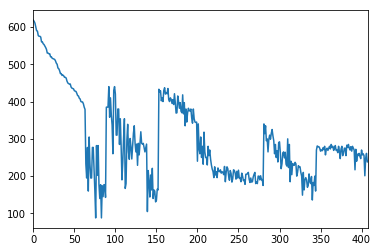

In [166]:
df['Median Sale Price'].plot()

In [128]:
df = pd.read_csv('/Volumes/Secondary/Downloads/data_crosstab.csv',sep='\t',encoding='utf-16')

# Pull all csvs in

In [120]:
import glob

#csvs = glob.glob('/Volumes/Secondary/Downloads/boston_*_data_data_full.csv')
csvs = glob.glob('/Volumes/Secondary/Downloads/*_*_data_data.csv')

master_d565656f = pd.DataFrame()
for csv in csvs:
    df = pd.read_csv(csv,sep='\t',encoding='utf-16')
    master_df = pd.concat([master_df,df],axis=0)

In [121]:
csvs

['/Volumes/Secondary/Downloads/boston_all_data_data.csv',
 '/Volumes/Secondary/Downloads/boston_condo_data_data.csv',
 '/Volumes/Secondary/Downloads/boston_multi_data_data.csv',
 '/Volumes/Secondary/Downloads/boston_single_data_data.csv',
 '/Volumes/Secondary/Downloads/boston_townhouse_data_data.csv',
 '/Volumes/Secondary/Downloads/camb_all_data_data.csv',
 '/Volumes/Secondary/Downloads/camb_condo_data_data.csv',
 '/Volumes/Secondary/Downloads/camb_multi_data_data.csv',
 '/Volumes/Secondary/Downloads/camb_single_data_data.csv',
 '/Volumes/Secondary/Downloads/camb_townhouse_data_data.csv']

## Look at 1st csv

In [51]:
#has duplicated data as below. no need
bc_df = pd.read_csv('bost_camb.csv')

In [54]:
bc_df['Region'].unique()

array(['Boston, MA', 'Boston, MA - Allston',
       'Boston, MA - Andrew Square / Columbus Park',
       'Boston, MA - Ashmont', 'Boston, MA - Back Bay',
       'Boston, MA - Back of the Hill / Rth', 'Boston, MA - Bay Village',
       'Boston, MA - Beacon Hill', 'Boston, MA - Bellevue Hill',
       'Boston, MA - Bowdoin North-Mount Bowdoin', 'Boston, MA - Brighton',
       'Boston, MA - Brook Farm',
       'Boston, MA - Bunker Hill / Thompson Square',
       'Boston, MA - Cedar Grove / East Lower Mills',
       'Boston, MA - Central Maverick Square-Paris Street',
       'Boston, MA - Centre-South', 'Boston, MA - Charlestown',
       'Boston, MA - City Point', 'Boston, MA - Codman Square',
       'Boston, MA - Codman Square-East Codman Hill',
       'Boston, MA - Columbia Point', 'Boston, MA - Commonwealth',
       'Boston, MA - D Street-West Broadway', 'Boston, MA - Dorchester',
       'Boston, MA - Downtown Boston',
       'Boston, MA - Dudley-Brunswick King', 'Boston, MA - Eagle Hill

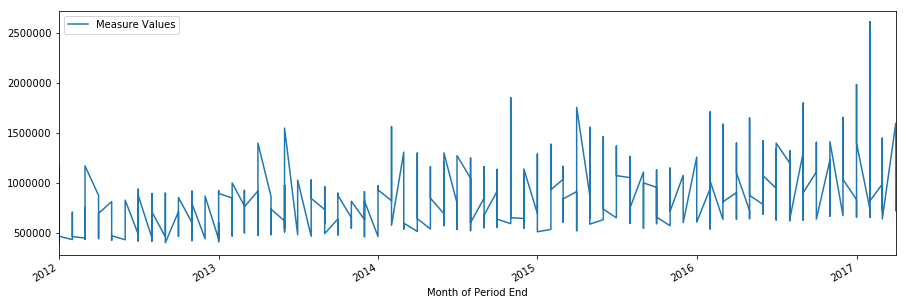

In [198]:
bc_df[(bc_df['Region'] == 'Cambridge, MA')&
      (bc_df['Measure Names'] == 'Median Sale Price')].plot(y='Measure Values',
                                                            x='Month of Period End',figsize=(15,5))

In [206]:
bc_df[(bc_df['Region'] == 'Cambridge, MA')&
      (bc_df['Measure Names'] == 'Median Sale Price')]['Region'].value_counts()

#['Month of Period End'].value_counts()

Cambridge, MA    320
Name: Region, dtype: int64

# EDA full data csv

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [123]:
bc_full_df = pd.read_csv('bost_camb_full.csv')

In [5]:
#bc_full_df.info()

In [125]:
#how much data is missing
(bc_full_df.isnull().sum() / bc_full_df.shape[0]).sort_values(ascending=False).head()

Measure Display         1.000000
Price Drops Mom         0.954471
Price Drops Yoy         0.954133
Price Drops             0.940390
months_of_supply_mom    0.883099
dtype: float64

In [620]:
#columns over 88% empty
high_null_cols = ['Price Drops Mom',
'Price Drops Yoy',
'Price Drops',
'months_of_supply_mom',
'months_of_supply_yoy',
'months_of_supply']

In [621]:
bc_full_df['Number of Records'].value_counts()

1    23721
Name: Number of Records, dtype: int64

In [622]:
bc_full_df['Region'].head()

0    Boston, MA - Logan Airport / Jeffries Point
1                          Boston, MA - Brighton
2     Boston, MA - Andrew Square / Columbus Park
3                           Boston, MA - Ashmont
4            Boston, MA - Back of the Hill / Rth
Name: Region, dtype: object

In [623]:
bc_full_df['Region Type'].value_counts()

neighborhood    20895
place            2507
metro             319
Name: Region Type, dtype: int64

In [624]:
towns = bc_full_df['Region Type'] == 'place'
bc_full_df[towns].head(1)

Unnamed: 0 Worksheet Filter  Measure Display  Number of Records  \
77          77            Value              NaN                  1   

    Avg Sale To List Avg Sale To List Mom Avg Sale To List Yoy    City  \
77          1.001817                -0.6%                -0.1%  Boston   

    Homes Sold Homes Sold Mom    ...    Price Drops Yoy    Property Type  \
77         729          -2.3%    ...          -0.004041  All Residential   

        Region Region Type  Sold Above List  Sold Above List Mom  \
77  Boston, MA       place          0.40192            -0.041779   

    Sold Above List Yoy          State  State Code  Table Id  
77            -0.007953  Massachusetts          MA    1826.0  

[1 rows x 50 columns]

In [625]:
#bc_full_df.groupby(['Region Type','Region']).size()

In [626]:
for col in bc_full_df.columns:
    if bc_full_df[col].dtype == 'object':
        pass
        #print(col)
    #print(bc_full_df[col].value_counts().head())

In [627]:
bc_full_df = bc_full_df.drop('Worksheet Filter',axis=1)
bc_full_df = bc_full_df.drop('Measure Display',axis=1)
bc_full_df = bc_full_df.drop('Number of Records',axis=1)
bc_full_df = bc_full_df.drop('Unnamed: 0',axis=1)
bc_full_df = bc_full_df.drop('State',axis=1)
bc_full_df = bc_full_df.drop('Table Id',axis=1)
bc_full_df = bc_full_df.drop('Period Duration',axis=1)
bc_full_df = bc_full_df.drop('Period Begin',axis=1)

In [628]:
#columns over 88% empty
high_null_cols = ['Price Drops Mom',
'Price Drops Yoy',
'Price Drops',
'months_of_supply_mom',
'months_of_supply_yoy',
'months_of_supply']

In [630]:
dates = ['Period End'] #dropped Period End

for col in dates:
    bc_full_df[col] = pd.to_datetime(bc_full_df[col])

In [631]:
percents = ['Median Sale Price Mom',
'Median Sale Price Yoy',
'New Listings Mom',
'New Listings Yoy',
'Homes Sold Mom',
'Homes Sold Yoy',
'Inventory Mom',
'Inventory Yoy',
'Avg Sale To List Mom',
'Avg Sale To List Yoy']

for col in percents:
    bc_full_df[col] = bc_full_df[col].str.strip('%')
    bc_full_df[col] = pd.to_numeric(bc_full_df[col])

In [632]:
prices = ['Median Sale Price']

for col in prices:
    bc_full_df[col] = bc_full_df[col].str.strip('$').str.strip('K').str.replace(',','')
    bc_full_df[col] = pd.to_numeric(bc_full_df[col])

# Which region types have nulls?
- neighborhoods are missing months_of_supply and price_drops

In [385]:
for n in clean_df['Region'].unique():
    mask = ((clean_df['Region'] == n) & (clean_df['Property Type'] == 'All Residential'))
    print(n,clean_df[mask].isnull().sum())

Boston, MA - Logan Airport / Jeffries Point Avg Sale To List          0
Avg Sale To List Mom      0
Avg Sale To List Yoy      0
City                      0
Homes Sold                0
Homes Sold Mom            0
Homes Sold Yoy            0
Inventory                 0
Inventory Mom             0
Inventory Yoy             0
Median Dom                0
Median Dom Mom            0
Median Dom Yoy            0
Median List Ppsf          0
Median List Ppsf Mom      0
Median List Ppsf Yoy      0
Median List Price         0
Median List Price Mom     0
Median List Price Yoy     0
Median Ppsf               0
Median Ppsf Mom           0
Median Ppsf Yoy           0
Median Sale Price         0
Median Sale Price Mom     0
Median Sale Price Yoy     0
months_of_supply         64
months_of_supply_mom     64
months_of_supply_yoy     64
New Listings              0
New Listings Mom          0
New Listings Yoy          0
Price Drops              64
Price Drops Mom          64
Price Drops Yoy          64
Prop

In [378]:
mask = ((clean_df['Region'] == 'Boston, MA'))# &
#       (clean_df['Property Type'] == 'All Residential'))

In [379]:
df = clean_df

In [383]:
df[mask].isnull().sum().sum()

384

In [360]:
df = bos

In [386]:
clean_df.isnull().sum()

Avg Sale To List             7
Avg Sale To List Mom       845
Avg Sale To List Yoy      1872
City                       319
Homes Sold                   0
Homes Sold Mom             837
Homes Sold Yoy            1859
Inventory                 1767
Inventory Mom             2864
Inventory Yoy             3545
Median Dom                  41
Median Dom Mom             885
Median Dom Yoy            1914
Median List Ppsf          1157
Median List Ppsf Mom      2188
Median List Ppsf Yoy      2995
Median List Price         1150
Median List Price Mom     2180
Median List Price Yoy     2993
Median Ppsf                  8
Median Ppsf Mom            843
Median Ppsf Yoy           1867
Median Sale Price            0
Median Sale Price Mom      837
Median Sale Price Yoy     1859
months_of_supply         20900
months_of_supply_mom     20948
months_of_supply_yoy     20947
New Listings              1148
New Listings Mom          2178
New Listings Yoy          2989
Price Drops              22307
Price Dr

# Function to clean data going forward:

In [447]:
def clean_raw(bc_full_df):
    #alsways drop these cols
    bc_full_df = bc_full_df.drop('Worksheet Filter',axis=1)
    bc_full_df = bc_full_df.drop('Measure Display',axis=1)
    bc_full_df = bc_full_df.drop('Number of Records',axis=1)
    bc_full_df = bc_full_df.drop('Unnamed: 0',axis=1)
    bc_full_df = bc_full_df.drop('State',axis=1)
    bc_full_df = bc_full_df.drop('Table Id',axis=1)
    bc_full_df = bc_full_df.drop('Period Duration',axis=1)
    bc_full_df = bc_full_df.drop('Period Begin',axis=1)
    
    #drop when doing neighborhoods
#     bc_full_df = bc_full_df.drop('months_of_supply',axis=1)
#     bc_full_df = bc_full_df.drop('months_of_supply_yoy',axis=1)
#     bc_full_df = bc_full_df.drop('months_of_supply_mom',axis=1)
#     bc_full_df = bc_full_df.drop('Price Drops',axis=1)
#     bc_full_df = bc_full_df.drop('Price Drops Yoy',axis=1)
#     bc_full_df = bc_full_df.drop('Price Drops Mom',axis=1)

    #drop 2nd date col
    dates = ['Period End'] #dropped Period End
    for col in dates:
        bc_full_df[col] = pd.to_datetime(bc_full_df[col])
    
    #format percent cols
    percents = ['Median Sale Price Mom',
    'Median Sale Price Yoy',
    'New Listings Mom',
    'New Listings Yoy',
    'Homes Sold Mom',
    'Homes Sold Yoy',
    'Inventory Mom',
    'Inventory Yoy',
    'Avg Sale To List Mom',
    'Avg Sale To List Yoy']
    for col in percents:
        bc_full_df[col] = bc_full_df[col].str.strip('%')
        bc_full_df[col] = pd.to_numeric(bc_full_df[col])
        
    #format money cols
    prices = ['Median Sale Price']
    for col in prices:
        bc_full_df[col] = bc_full_df[col].str.strip('$').str.strip('K').str.replace(',','')
        bc_full_df[col] = pd.to_numeric(bc_full_df[col])
    
    #change scale
    bc_full_df['Median List Price'] = bc_full_df['Median List Price'] / 1000.0
    
    #set index
    bc_full_df = bc_full_df.sort_values('Period End')
    bc_full_df = bc_full_df.set_index('Period End')
    
    return bc_full_df

# Import and clean

In [127]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [128]:
bc_full_df = pd.read_csv('bost_camb_full.csv')

In [129]:
bc_full_df = clean_raw(bc_full_df)

# Determine which features are seasonal which aren't
- what type of seasonal trend they have:
- addititive vs multiplicative

![image](/files/addvsmulti.png)

In [161]:
[col for col in bc_full_df.columns if 'Yoy' not in col and 'Mom' not in col and bc_full_df[col].dtype != 'object']

['Avg Sale To List',
 'Homes Sold',
 'Inventory',
 'Median Dom',
 'Median List Ppsf',
 'Median List Price',
 'Median Ppsf',
 'Median Sale Price',
 'months_of_supply',
 'months_of_supply_mom',
 'months_of_supply_yoy',
 'New Listings',
 'Price Drops',
 'Sold Above List']

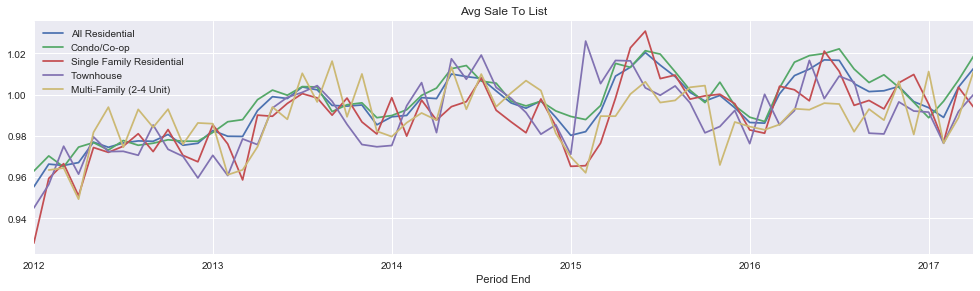

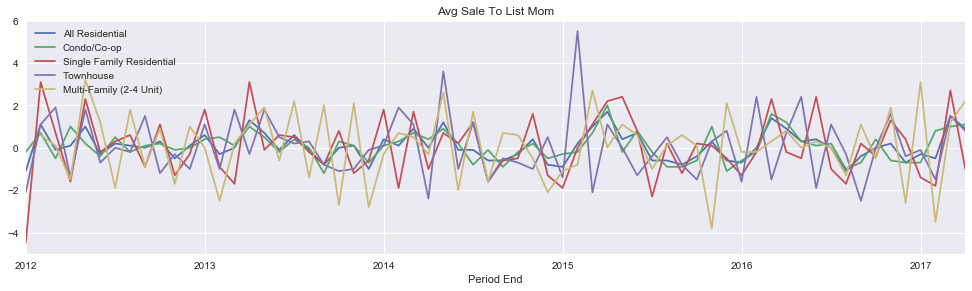

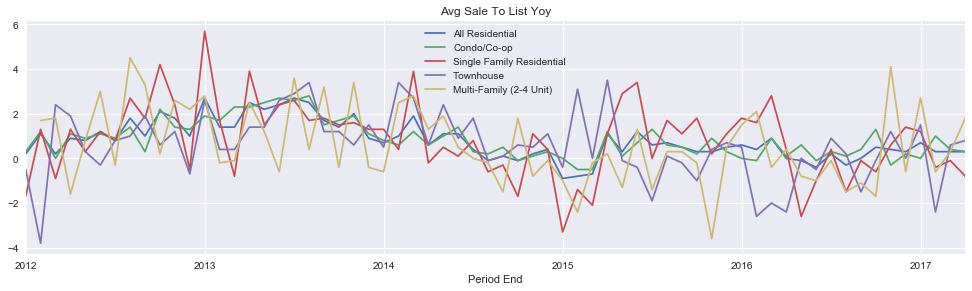

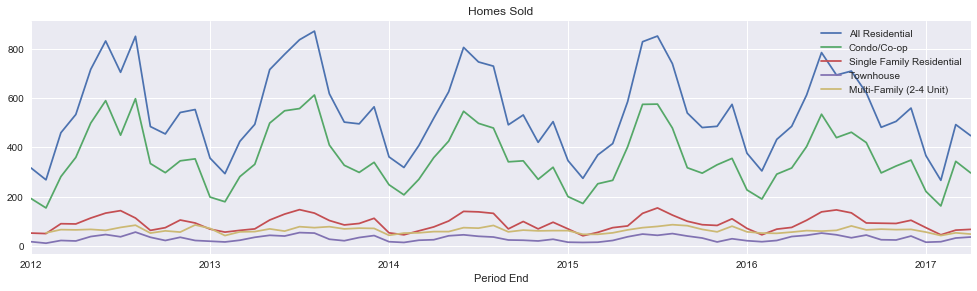

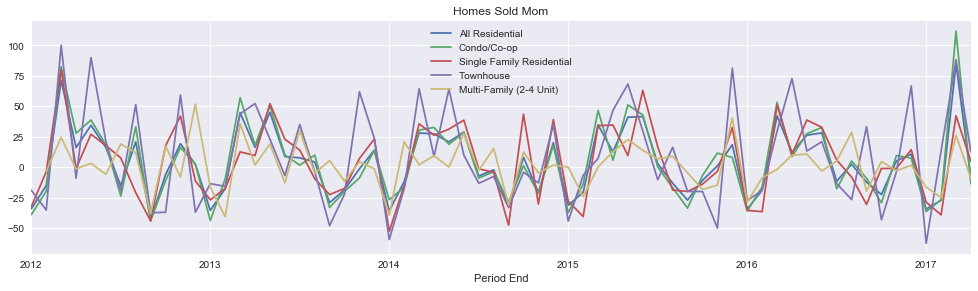

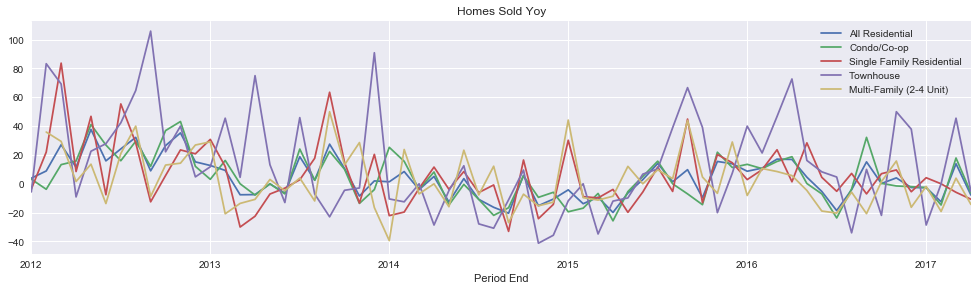

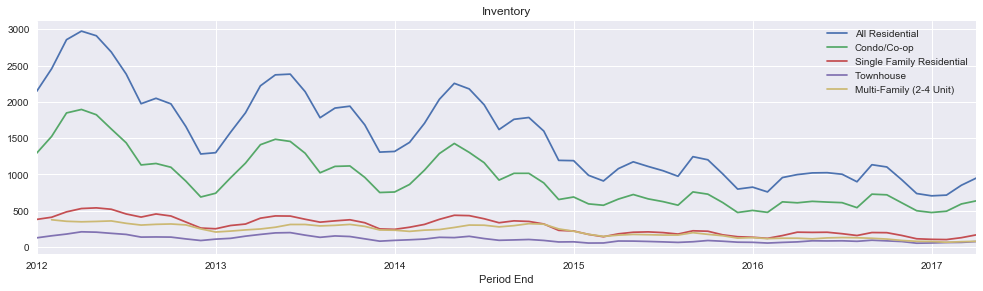

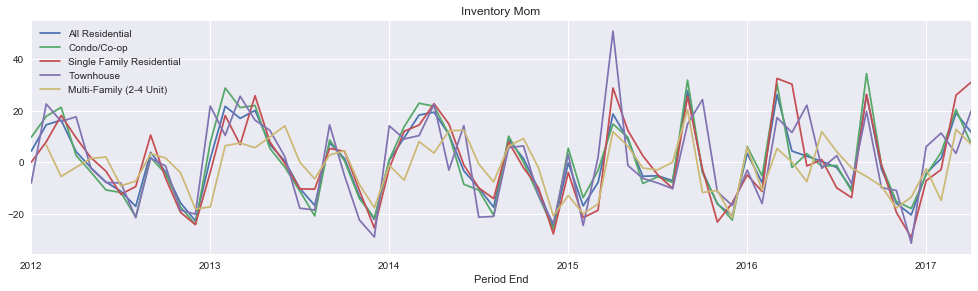

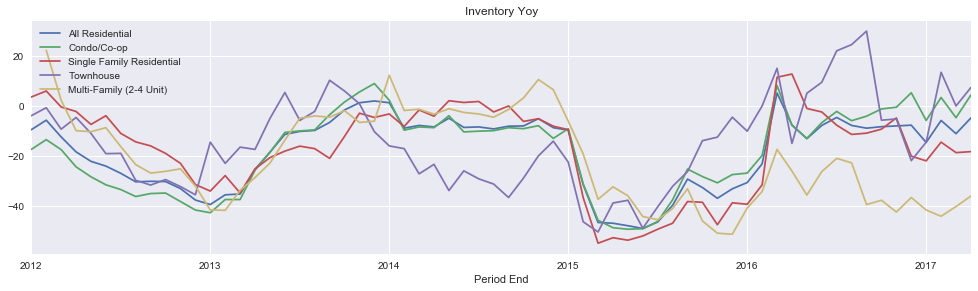

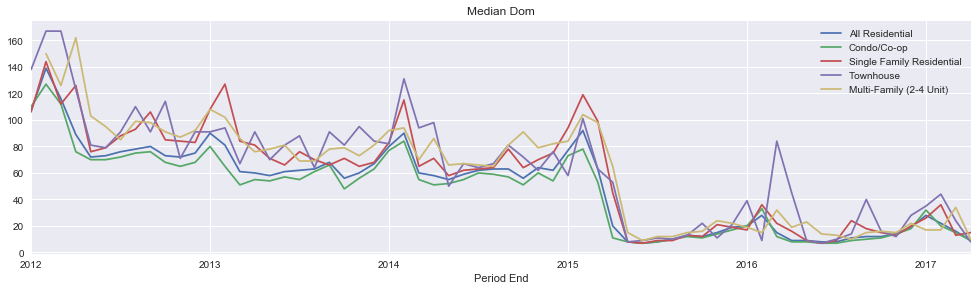

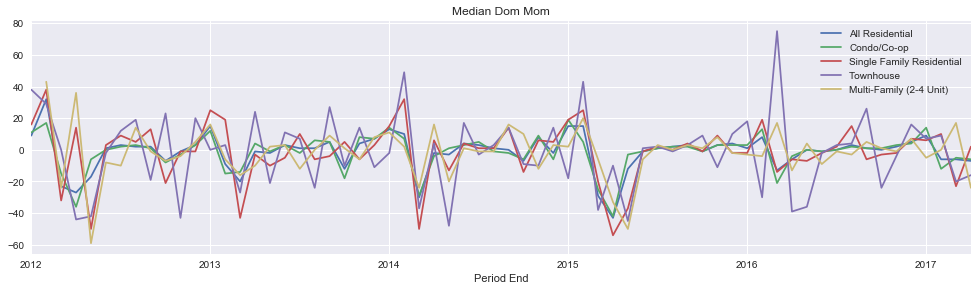

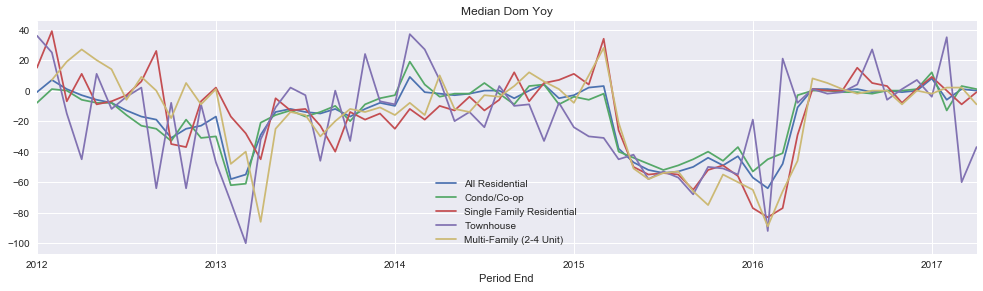

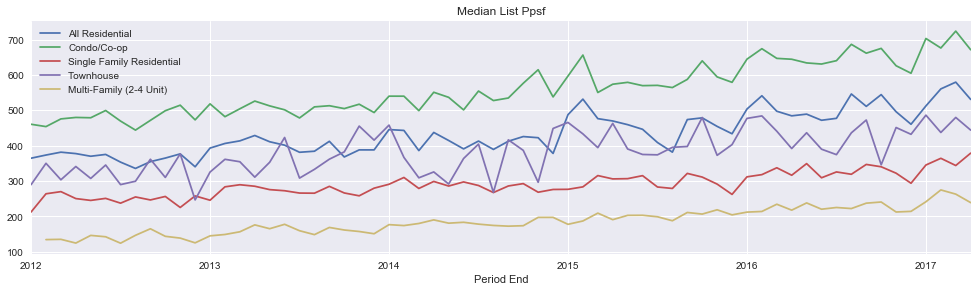

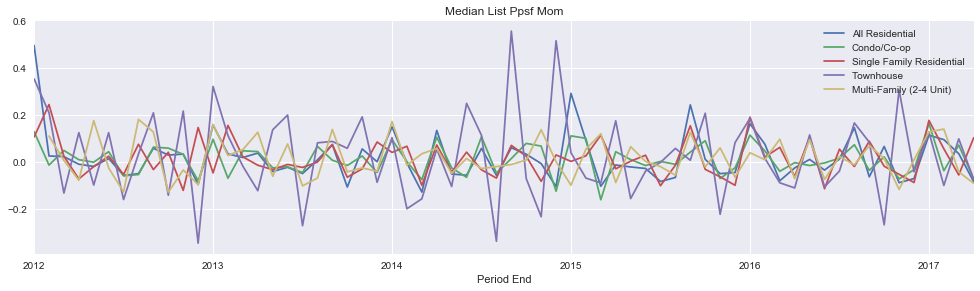

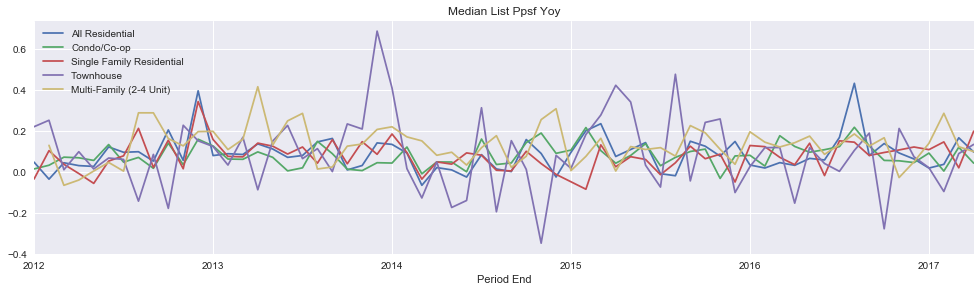

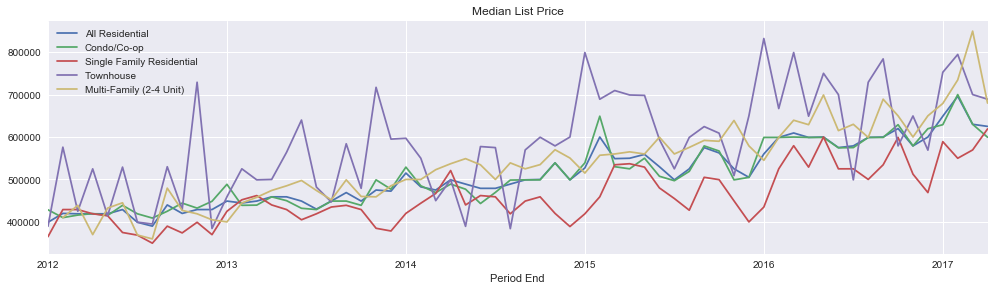

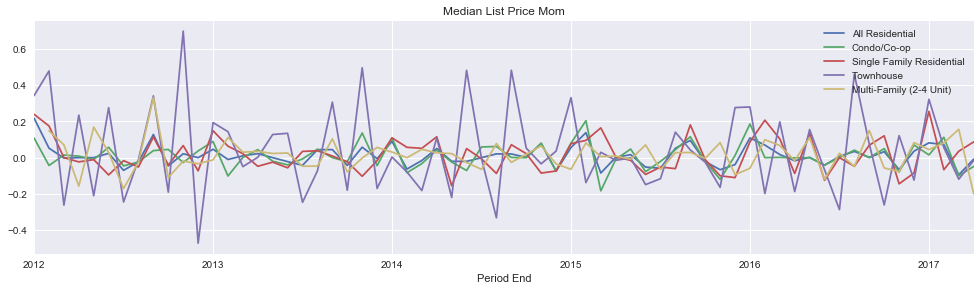

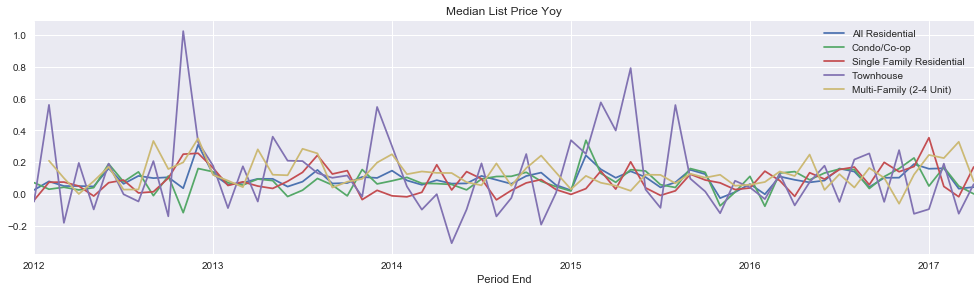

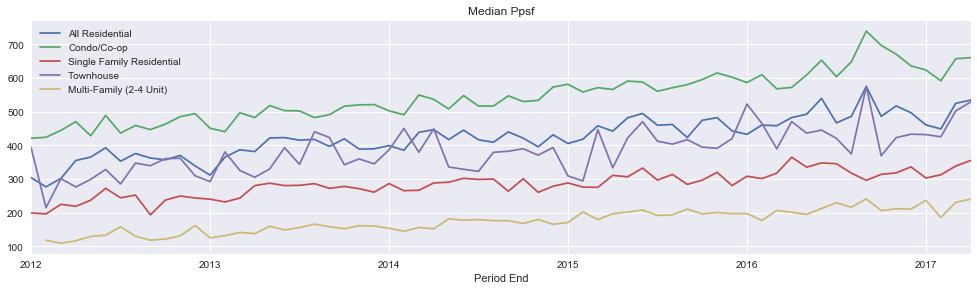

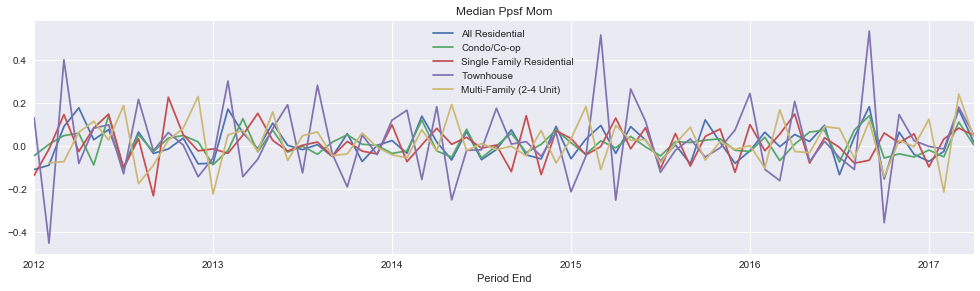

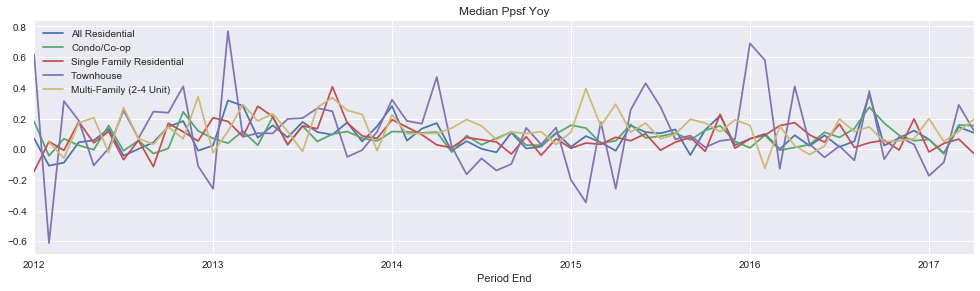

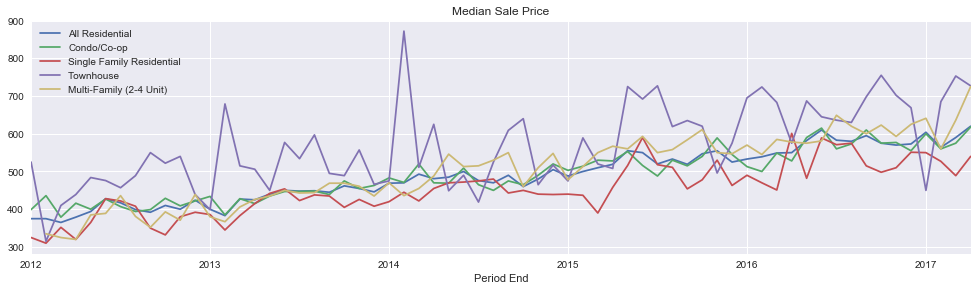

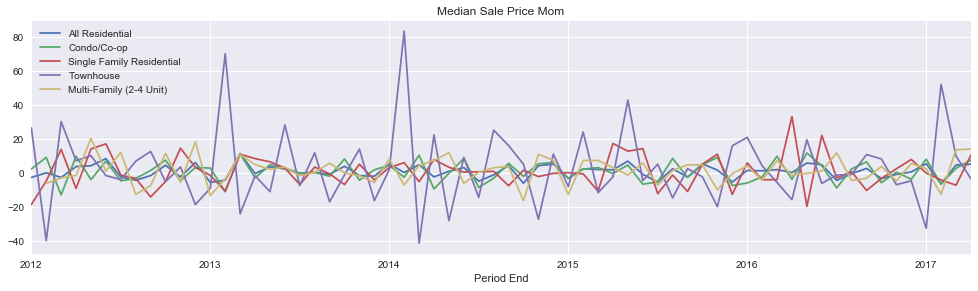

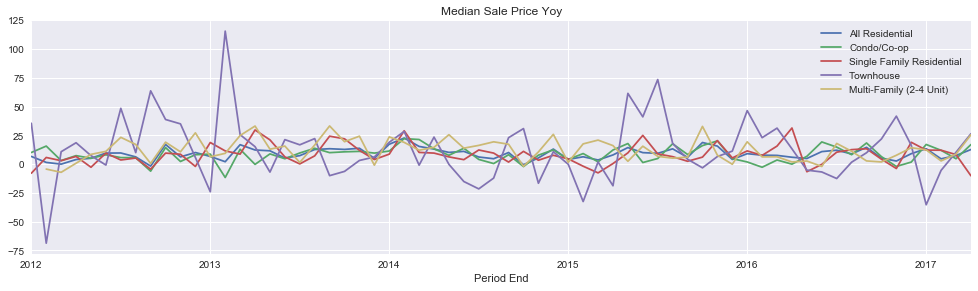

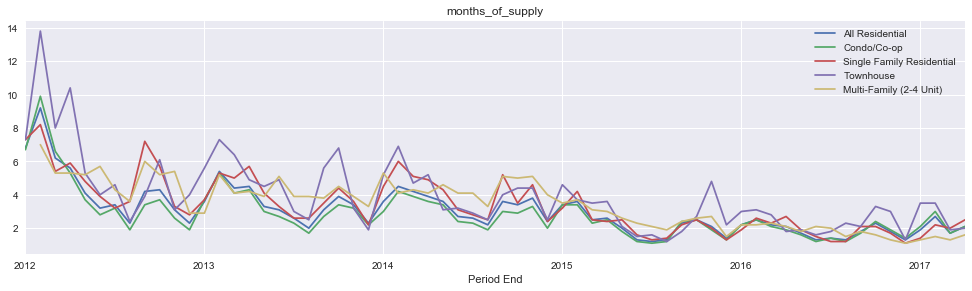

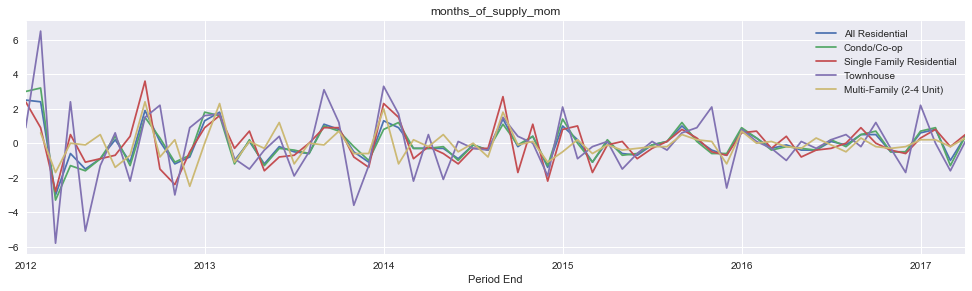

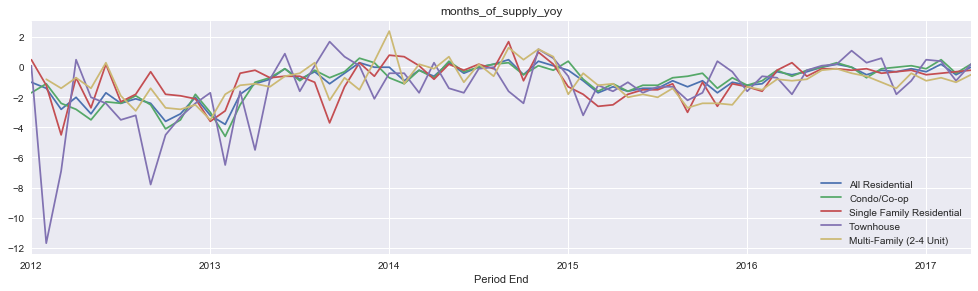

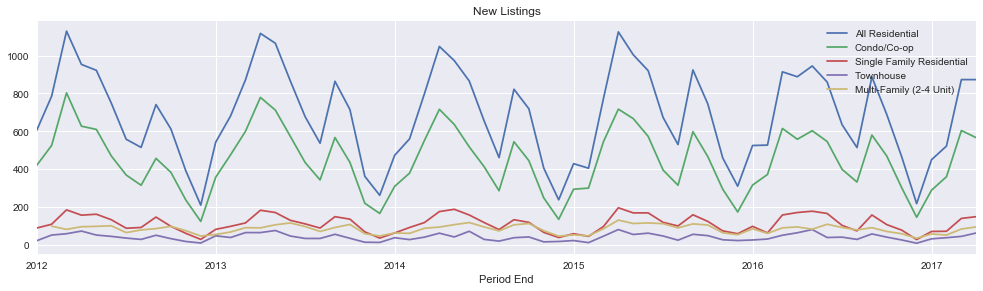

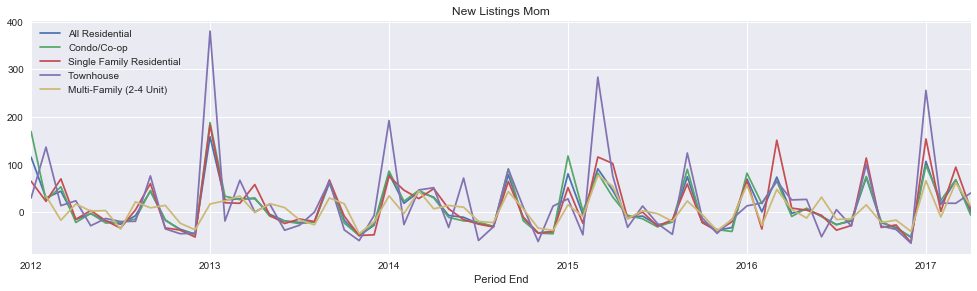

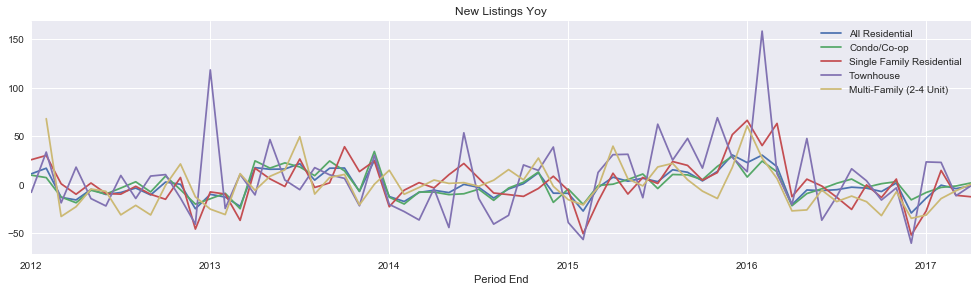

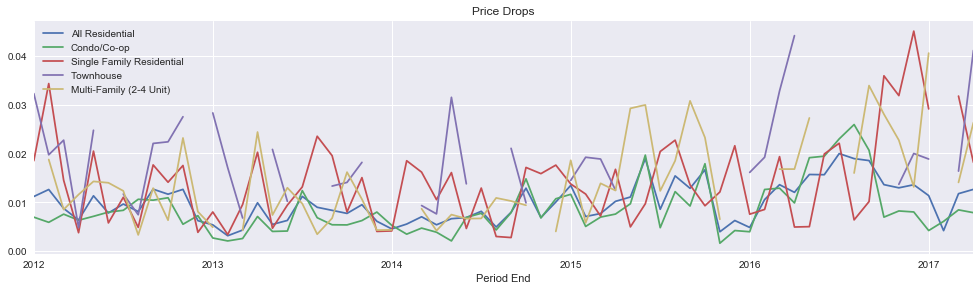

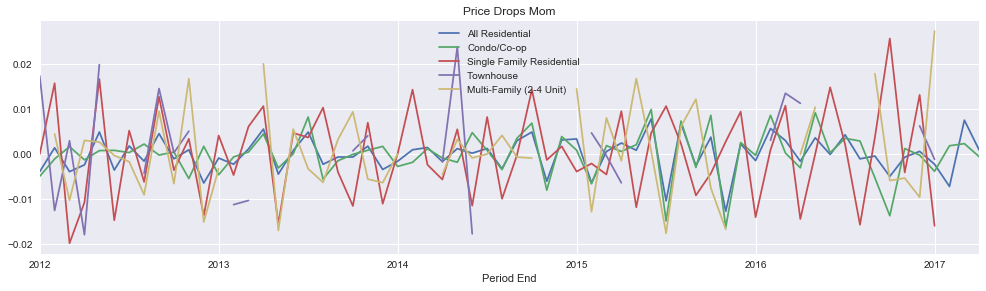

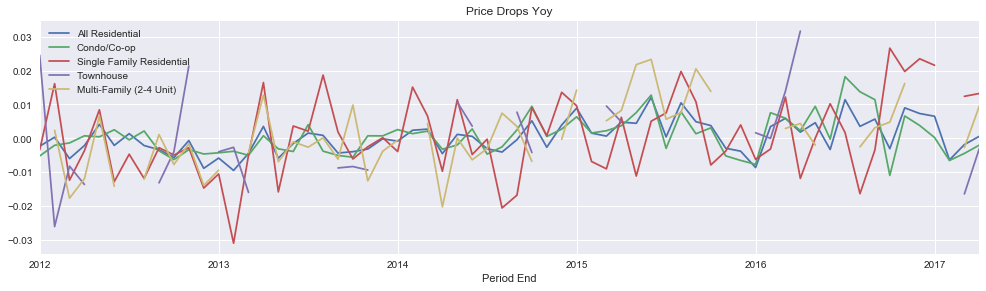

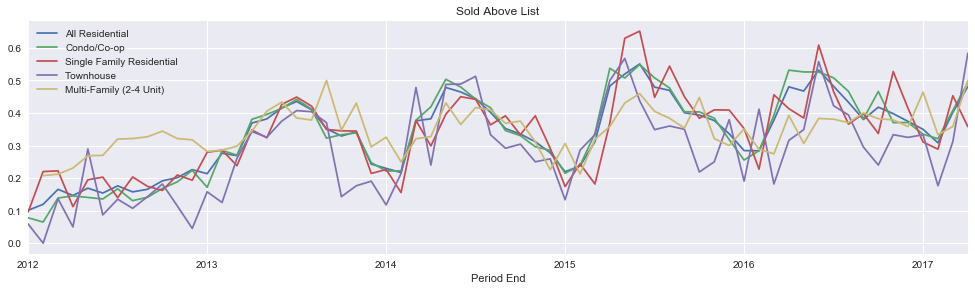

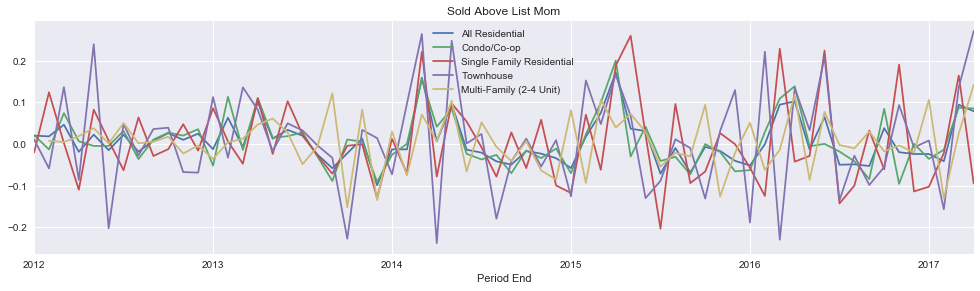

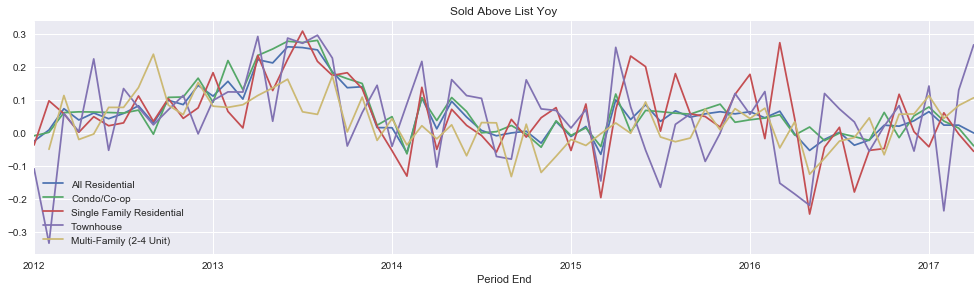

In [1388]:
#for target in [col for col in bc_full_df.columns if 'Yoy' not in col and 'Mom' not in col and bc_full_df[col].dtype != 'object']:
for target in [col for col in bc_full_df.columns if bc_full_df[col].dtype != 'object']:
    plt.figure()
    #target='Median Dom'
    labels=[]
    for prop_type in bc_full_df['Property Type'].unique():
        labels.append(prop_type)
        #mask for each plot
        mask = ((bc_full_df['Region'] == 'Boston, MA') &
               (bc_full_df['Property Type'] == prop_type))
        #plot
        ax = bc_full_df[mask][target].plot(figsize=(15,4),title=target)
        ax.legend(labels=labels)

In [261]:
#decomposition
seasonal_features = ['Avg Sale To List','Homes Sold','Inventory','Median Dom','months_of_supply','New Listings','Sold Above List']
decomposition_type = ['add','add','multi','add','multi','add','add']

In [640]:
df = bc_full_df[mask]
df = df.sort_values('Period End')
df = df.set_index('Period End')

In [831]:
df['Property Type'].unique()

array(['All Residential'], dtype=object)

In [641]:
df.index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [642]:
from datetime import timedelta
from datetime import datetime

In [643]:
rng = pd.date_range('2016-04-30', periods = 12, freq = 'M')
start = rng[0]
end = rng[-1]
df[start:end]['months_of_supply'].count()

12

In [832]:
for col in [col for col in bc_full_df.columns if bc_full_df[col].dtype != 'object']:
    pass
#    print(col)

In [645]:
#validate it gets 12 months each time
for month in months:
    t = 1
    rng = pd.date_range(end=month, periods = 12+t, freq = 'M')
    start = rng[0]
    end = rng[-1-t]
    print(df[start:end]['months_of_supply'])#.count())

Period End
2016-04-30    2.1
2016-05-31    1.7
2016-06-30    1.3
2016-07-31    1.4
2016-08-31    1.3
2016-09-30    1.8
2016-10-31    2.3
2016-11-30    1.8
2016-12-31    1.3
2017-01-31    1.9
2017-02-28    2.7
2017-03-31    1.7
Name: months_of_supply, dtype: float64


# Seasonal Decomposition

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

/Users/xbno/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [1117]:
df = pd.read_csv('bost_camb_full.csv')

In [1118]:
clean_df = clean_raw(df)

In [1119]:
#[col for col in clean_df.columns if clean_df[col].dtype =='object']
#[col for col in clean_df.columns if clean_df[col].dtype =='object']

In [1120]:
#clean_df[clean_df['Region'] == 'Boston, MA'].columns

In [1121]:
#def clean_obj(clean_df):
    

In [1122]:
mask = ((clean_df['Region'] == 'Boston, MA') &
       (clean_df['Property Type'] == 'All Residential'))

In [1123]:
bos = clean_df[mask]

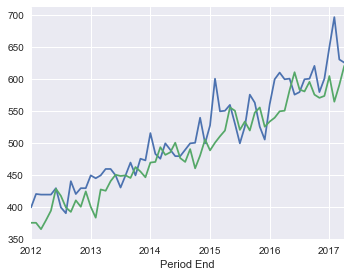

In [1124]:
bos['Median List Price'].plot()
bos['Median Sale Price'].plot()

In [1125]:
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4
import pyflux as pf

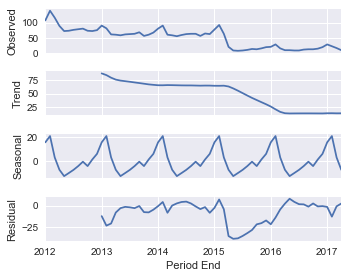

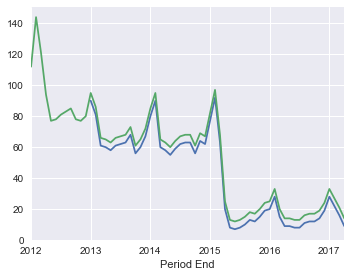

In [1391]:
decomposition = sm.tsa.seasonal_decompose(bos['Median Dom'], model='additive', two_sided=False, freq=12)
fig = decomposition.plot()
plt.figure()

#certainly works but you lose 12 months on front
(decomposition.trend+decomposition.seasonal+decomposition.resid).plot()
(bos['Median Dom'] +5).plot()

In [1127]:
def decomp(series,trend=False,seas=False,resid=False,model='add'):
    df = pd.DataFrame()
    col_decomp = sm.tsa.seasonal_decompose(series, model=model,two_sided=False)
    #df[col] = col_decomp.observed
    if trend:
        df[series.name+' Trend'] = col_decomp.trend
    if seas:
        df[series.name+' Seasonal'] = col_decomp.seasonal
    if resid:
        df[series.name+' Residual'] = col_decomp.resid
    return df

# Decomposition for all variables, keep only residuals

In [1129]:
bos = bos.drop(['Property Type','Region','Region Type','State Code','City'],axis=1)

In [1130]:
#bos_med_sale_resid_df
# seasonal_features = ['Median Sale Price','Avg Sale To List','Homes Sold','Inventory','Median Dom','months_of_supply','New Listings','Sold Above List']
# decomp_type = ['add','add','add','multi','add','multi','add','add']

#bos_med_sale_df
seasonal_features = ['Avg Sale To List','Homes Sold','Inventory','Median Dom','months_of_supply','New Listings','Sold Above List']
decomp_type = ['add','add','multi','add','multi','add','add']

df = bos

#for col in [col for col in df.columns if df[col].dtype != 'object']:
try:
    for seas_col,d_type in zip(seasonal_features,decomp_type):
        print(seas_col)
        df = pd.concat([df,decomp(df[seas_col],trend=True,seas=True,resid=True,model=d_type)],axis=1)
        df.drop(seas_col,axis=1,inplace=True)
except Exception:
    pass

Avg Sale To List
Homes Sold
Inventory
Median Dom
months_of_supply
New Listings
Sold Above List


In [734]:
#load
#bos_med_sale_resid_df = pd.read_csv('bos_med_sale_resid_df.csv')
#bos_med_sale_df = pd.read_csv('bos_med_sale_df.csv')

#save
#bos_med_sale_df.to_csv('bos_med_sale_df.csv')
#bos_med_sale_resid_df.to_csv('bos_med_sale_resid_df.csv')

In [735]:
import pyflux as pf

In [743]:
#bos_med_sale_df = bos_med_sale_df.drop(['Property Type','Region','Region Type','State Code','City'],axis=1)
#bos_med_sale_resid_df = bos_med_sale_resid_df.drop(['Property Type','Region','Region Type','State Code','City'],axis=1)

In [780]:
bos_med_sale_df = bos_med_sale_df.dropna(axis=0)

In [1299]:
model = pf.VAR(data=bos, lags=1, integ=2, target='Median Sale Price')

In [1300]:
x = model.fit()
x.summary()

VAR(1)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced Differenced Avg Sale To Method: OLS                                       
Start Date: 2012-02-29 00:00:00                         Log Likelihood: 12269.0871                        
End Date: 2017-04-30 00:00:00                           AIC: -20542.1742                                  
Number of observations: 61                              BIC: -16324.6482                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced Differenced Avg Sale To List 0.0002     0.0004     0.4913   0.6232   (-0.0005 | 0.0009)       
Differenced Differenced Avg Sale To L

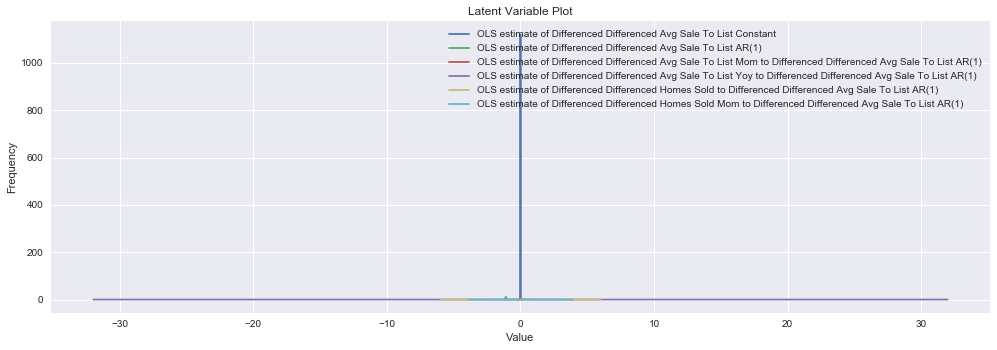

In [1301]:
model.plot_z(list(range(0,6)),figsize=(15,5))
#model.plot_fit(figsize=(15,5))

In [1302]:
model.predict_is()

AttributeError: module 'pandas.tseries' has no attribute 'index'

In [1298]:
model.plot_predict(past_values=1, h=1, figsize=(15,5))
#model.plot_predict_is(h=30, figsize=((15,5)))

AttributeError: module 'pandas.tseries' has no attribute 'index'

In [791]:
#pd.tseries.index.DatetimeIndex
pd.core.indexes.datetimes.DatetimeIndex

pandas.core.indexes.datetimes.DatetimeIndex

In [834]:
model = pf.ARIMA(data=bos, ar=2, ma=2, target='Median Sale Price', family=pf.Normal())

In [835]:
x = model.fit("MLE")
x.summary()


Normal ARIMA(2,0,2)                                                                                       
======================================================= ==================================================
Dependent Variable: Median Sale Price                   Method: MLE                                       
Start Date: 2012-03-31 00:00:00                         Log Likelihood: -259.6148                         
End Date: 2017-04-30 00:00:00                           AIC: 531.2296                                     
Number of observations: 62                              BIC: 543.9924                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 30.4575    10.9111    2.7914   0.0052   (9.0719 | 51.8432)       
AR(1)                                

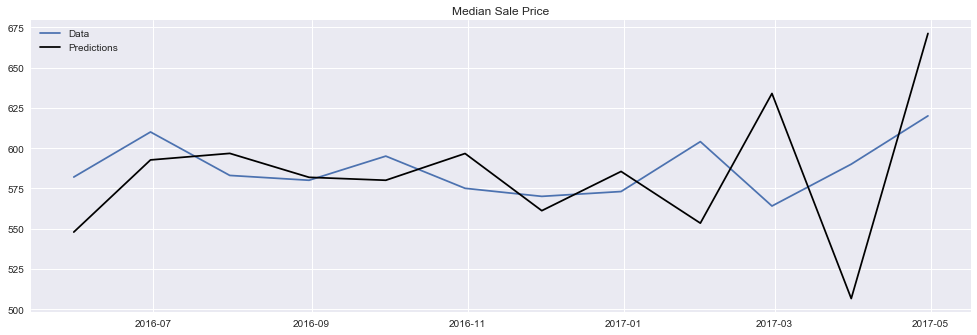

In [836]:
model.plot_predict_is(h=12, figsize=(15,5))

In [833]:
model.predict_is(h=5)

AttributeError: module 'pandas.tseries' has no attribute 'index'

In [652]:
df = df.sort_index(axis=1)

In [1131]:
df.columns

Index(['Avg Sale To List Mom', 'Avg Sale To List Yoy', 'Homes Sold Mom',
       'Homes Sold Yoy', 'Inventory Mom', 'Inventory Yoy', 'Median Dom Mom',
       'Median Dom Yoy', 'Median List Ppsf', 'Median List Ppsf Mom',
       'Median List Ppsf Yoy', 'Median List Price', 'Median List Price Mom',
       'Median List Price Yoy', 'Median Ppsf', 'Median Ppsf Mom',
       'Median Ppsf Yoy', 'Median Sale Price', 'Median Sale Price Mom',
       'Median Sale Price Yoy', 'months_of_supply_mom', 'months_of_supply_yoy',
       'New Listings Mom', 'New Listings Yoy', 'Price Drops',
       'Price Drops Mom', 'Price Drops Yoy', 'Sold Above List Mom',
       'Sold Above List Yoy', 'Avg Sale To List Trend',
       'Avg Sale To List Seasonal', 'Avg Sale To List Residual',
       'Homes Sold Trend', 'Homes Sold Seasonal', 'Homes Sold Residual',
       'Inventory Trend', 'Inventory Seasonal', 'Inventory Residual',
       'Median Dom Trend', 'Median Dom Seasonal', 'Median Dom Residual',
       'months_of_s

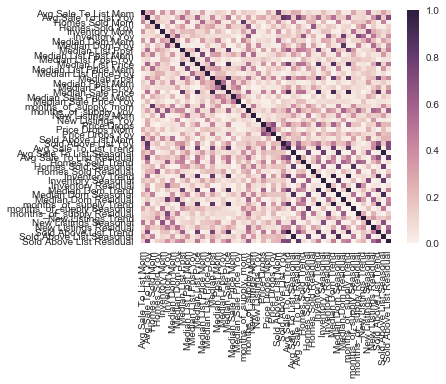

In [1132]:
sns.heatmap(df.corr().abs())

In [654]:
df.corr().abs()['Median Sale Price Residual'].sort_values(ascending=False).head(10)

Median Sale Price Residual    1.000000
Median Sale Price Yoy         0.742024
Median Sale Price Mom         0.527046
Median Ppsf Yoy               0.404505
Median Ppsf                   0.255556
Price Drops Yoy               0.249284
Median Ppsf Mom               0.240450
Price Drops                   0.224451
Inventory Residual            0.212972
New Listings Residual         0.212877
Name: Median Sale Price Residual, dtype: float64

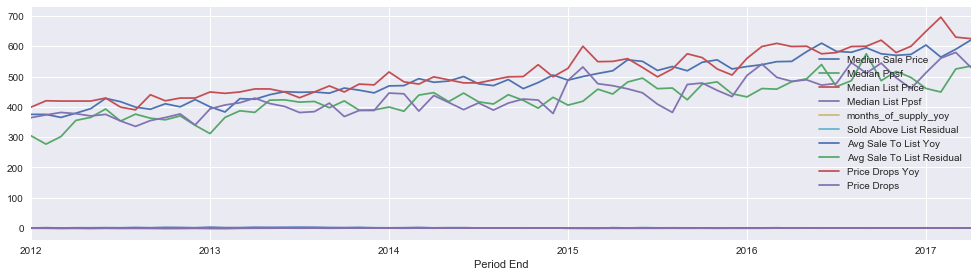

In [701]:
labels = []
for feat in df.corr().abs()['Median Sale Price'].sort_values(ascending=False).head(10).index:
    labels.append(feat)
    ax = df[feat].plot(figsize=(15,4))
ax.legend(labels=labels)

# Single Table of Variable [T-1 to T-12] Values

In [704]:
months = ['2017-04-30']

In [705]:
target = 'Median Sale Price'
#remove the T-0
master_df = pd.DataFrame()
for month in months:
    for t in range(0,13):   
        rng = pd.date_range(end=month, periods = 12+t, freq = 'M')
        start = rng[0]
        end = rng[-1-t]
        if t == 0:
            #print('y')
            target_df = df[start:end]['Median Sale Price']
            target_df = target_df.reset_index(drop=True)
            target_df = pd.DataFrame(target_df)
            target_df.rename(columns={'Median Sale Price':'Median Sale Price T-'+str(t)},inplace=True)
            master_df = pd.concat([master_df,target_df],axis=1)
        if t !=0:
            #print('n')
            tminus_df = df[start:end]['months_of_supply Residual']
            tminus_df = tminus_df.reset_index(drop=True)
            tminus_df = pd.DataFrame(tminus_df)
            tminus_df.rename(columns={'months_of_supply Residual':'months_of_supply Residual T-'+str(t)},inplace=True) #months_of_supply 
            master_df = pd.concat([master_df,tminus_df],axis=1)

y
n
n
n
n
n
n
n
n
n
n
n
n


In [706]:
master_df

Median Sale Price T-0  months_of_supply Residual T-1  \
0                     582                       0.904749   
1                     610                       0.921036   
2                     583                       0.895305   
3                     580                       1.004085   
4                     595                       1.037698   
5                     575                       0.912507   
6                     570                       1.026318   
7                     573                       0.894359   
8                     604                       0.958310   
9                     564                       0.970905   
10                    590                       1.063926   
11                    620                       0.832211   

    months_of_supply Residual T-2  months_of_supply Residual T-3  \
0                        0.977216                       0.874316   
1                        0.904749                       0.977216   
2                        0.921036                       0.904749   
3                        0.895305                       0.921036   
4                        1.004085                       0.895305   
5                        1.037698                       1.004085   
6                        0.912507                       1.037698   
7                        1.026318                       0.912507   
8                        0.894359                       1.026318   
9                        0.958310                       0.894359   
10                       0.970905                       0.958310   
11                       1.063926                       0.970905   

    months_of_supply Residual T-4  months_of_supply Residual T-5  \
0                        0.955136                       0.848426   
1                        0.874316                       0.955136   
2                        0.977216                       0.874316   
3                        0.904749                       0.977216   
4                        0.921036                       0.904749   
5                        0.895305                       0.921036   
6                        1.004085                       0.895305   
7                        1.037698                       1.004085   
8                        0.912507                       1.037698   
9                        1.026318                       0.912507   
10                       0.894359                       1.026318   
11                       0.958310                       0.894359   

    months_of_supply Residual T-6  months_of_supply Residual T-7  \
0                        0.823947                       0.851401   
1                        0.848426                       0.823947   
2                        0.955136                       0.848426   
3                        0.874316                       0.955136   
4                        0.977216                       0.874316   
5                        0.904749                       0.977216   
6                        0.921036                       0.904749   
7                        0.895305                       0.921036   
8                        1.004085                       0.895305   
9                        1.037698                       1.004085   
10                       0.912507                       1.037698   
11                       1.026318                       0.912507   

    months_of_supply Residual T-8  months_of_supply Residual T-9  \
0                        0.871135                       0.756483   
1                        0.851401                       0.871135   
2                        0.823947                       0.851401   
3                        0.848426                       0.823947   
4                        0.955136                       0.848426   
5                        0.874316                       0.955136   
6                        0.977216                       0.874316   
7                       

In [707]:
corr = master_df.corr()
corr['Median Sale Price T-0'].abs().sort_values(ascending=False)#.head()

Median Sale Price T-0             1.000000
months_of_supply Residual T-4     0.536638
months_of_supply Residual T-7     0.394269
months_of_supply Residual T-8     0.345246
months_of_supply Residual T-1     0.291620
months_of_supply Residual T-3     0.252120
months_of_supply Residual T-11    0.228552
months_of_supply Residual T-6     0.166607
months_of_supply Residual T-9     0.161884
months_of_supply Residual T-5     0.143557
months_of_supply Residual T-2     0.083046
months_of_supply Residual T-10    0.038926
months_of_supply Residual T-12    0.030801
Name: Median Sale Price T-0, dtype: float64

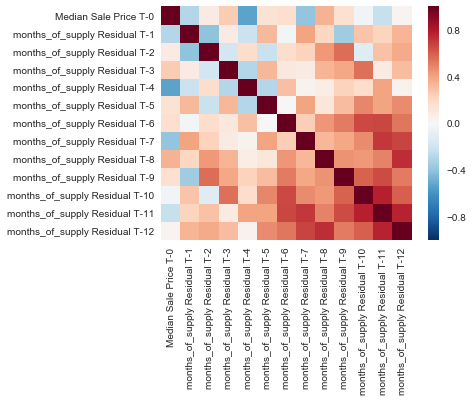

In [708]:
import seaborn as sns
sns.heatmap(corr)

# Table of All Variables [T-1 to T-12] Values

In [1133]:
months = ['2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30']

In [468]:
months = ['2017-04-30']

In [1134]:
target = 'Median Sale Price'

#builds dataframe for all [T-1 to T-12] for a each month in list
master_master_df = pd.DataFrame()
p = 30
for month in months:
    master_df = pd.DataFrame()
    for col in [col for col in df.columns if df[col].dtype != 'object']:
        for t in range(0,13):   
            #sets the timeframe
            rng = pd.date_range(end=month, periods = p+t, freq = 'M')
            start = rng[0]
            end = rng[-1-t]
            #adds the median sale price related to the timeframe
            if t == 0:
                target_df = df[start:end][target]
                target_df = target_df.reset_index(drop=True)
                target_df = pd.DataFrame(target_df)
                target_df.rename(columns={target:target+' T-'+str(t)},inplace=True)
                master_df = pd.concat([master_df,target_df],axis=1)
            #gets the independent variable values for each [T-1 to T-12] timeframe of that month
            if t != 0:
                tminus_df = df[start:end][col]
                tminus_df = tminus_df.reset_index(drop=True)
                tminus_df = pd.DataFrame(tminus_df)
                tminus_df.rename(columns={col:str(col)+' T-'+str(t)},inplace=True)
                master_df = pd.concat([master_df,tminus_df],axis=1)
    #cleans the duplicate columns of 'Median Sale Price T-0'
    cols = list(master_df.columns)
    for i,item in enumerate(master_df.columns):
        if item in master_df.columns[:i]: cols[i] = "toDROP"
    master_df.columns = cols
    master_df = master_df.drop("toDROP",1)
    #labels the index the month that was used
    master_df.index = [month]*p
    #adds the group below the last in the master_master
    master_master_df = pd.concat([master_master_df,master_df],axis=0)

In [1135]:
master_master_df.shape

(960, 601)

# Save versions of the master df
- bos_med_sale_resid_master_df
    - Median Sale Price Redisual
    - no trend or seasonality
- bos_med_sale_master_df
    - Median Sale Price
    - no trend or seasonality
- bos_med_sale_master_all_df
    - Median Sale Price
    - trend or seasonality and resid

In [1136]:
#bos_med_sale_resid_master_df = med_sale_resid.copy()
#bos_med_sale_master_df = master_master_df.copy()
bos_med_sale_master_all_df = master_master_df.copy()


In [1137]:
bos_med_sale_master_all_df.to_csv('bos_med_sale_master_all_df.csv')

In [1138]:
corr = master_df.corr()
corr['Median Sale Price T-0'].abs().sort_values(ascending=False)#.head(10)

Median Sale Price T-0            1.000000
Avg Sale To List Trend T-10      0.870373
Avg Sale To List Trend T-9       0.867607
Inventory Trend T-9              0.858800
Inventory Trend T-8              0.858461
Inventory Trend T-7              0.857507
Avg Sale To List Trend T-11      0.857457
Inventory Trend T-10             0.856860
Inventory Trend T-6              0.853271
Median Dom Trend T-3             0.850530
months_of_supply Trend T-2       0.849701
months_of_supply Trend T-3       0.849495
Avg Sale To List Trend T-8       0.849444
Median Dom Trend T-4             0.848358
Sold Above List Trend T-9        0.847953
months_of_supply Trend T-1       0.847479
Sold Above List Trend T-3        0.847293
Sold Above List Trend T-4        0.847286
months_of_supply Trend T-4       0.846867
Inventory Trend T-11             0.846724
Inventory Trend T-5              0.846096
Median Dom Trend T-2             0.845228
Sold Above List Trend T-5        0.844071
months_of_supply Trend T-5       0

In [475]:
#confirm the target values are updating as it cycles.. looks good
check_df = pd.DataFrame()
for i in master_master_df.index.unique():
    pass
    #print(master_master_df.loc[i]['Median Sale Price T-0'])
    #print(i)

In [665]:
months = master_master_df.index.unique()

In [477]:
months = ['2017-04-30']

In [667]:
master_master_df.corr()['Median Sale Price Residual T-0'].sort_values()

Avg Sale To List Residual T-8     -0.479504
Median Sale Price Residual T-12   -0.398971
Median Sale Price Yoy T-7         -0.390127
Median Sale Price Residual T-7    -0.388158
Median Ppsf Yoy T-9               -0.386232
Inventory Residual T-2            -0.380562
Avg Sale To List Residual T-9     -0.367288
Median List Ppsf Yoy T-11         -0.361552
Sold Above List Yoy T-12          -0.360310
Median Sale Price Residual T-9    -0.355894
Median Ppsf Yoy T-7               -0.343671
months_of_supply Residual T-2     -0.341100
Inventory Residual T-3            -0.340232
New Listings Residual T-3         -0.323075
Median Sale Price Yoy T-4         -0.321411
Median Sale Price Yoy T-9         -0.316675
Avg Sale To List Residual T-10    -0.296465
months_of_supply Residual T-4     -0.287816
Inventory Residual T-1            -0.286283
Median Sale Price Mom T-7         -0.284258
Median Ppsf Yoy T-10              -0.283204
Avg Sale To List Yoy T-8          -0.279611
Median List Price Yoy T-10      

# Having a hard time interpreting these.. I think this is what I wanted though

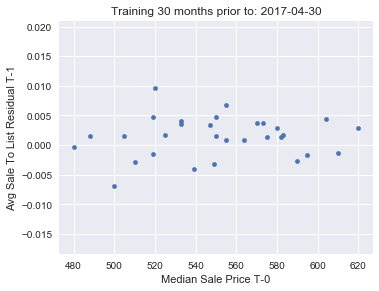

In [1140]:
master_master_df.loc[month].plot(x='Median Sale Price T-0',y='Avg Sale To List Residual T-1',kind='scatter',title='Training 30 months prior to: '+month)

In [480]:
import matplotlib.pyplot as plt
import re

In [481]:
re.findall(r'T-0','Median Sale Price T-0')

['T-0']

In [482]:
[col for col in master_master_df.columns if re.findall(r'T-1\b',col)][:5]

['Avg Sale To List Mom T-1',
 'Avg Sale To List Residual T-1',
 'Avg Sale To List Trend T-1',
 'Avg Sale To List Yoy T-1',
 'Homes Sold Mom T-1']

In [483]:
import re

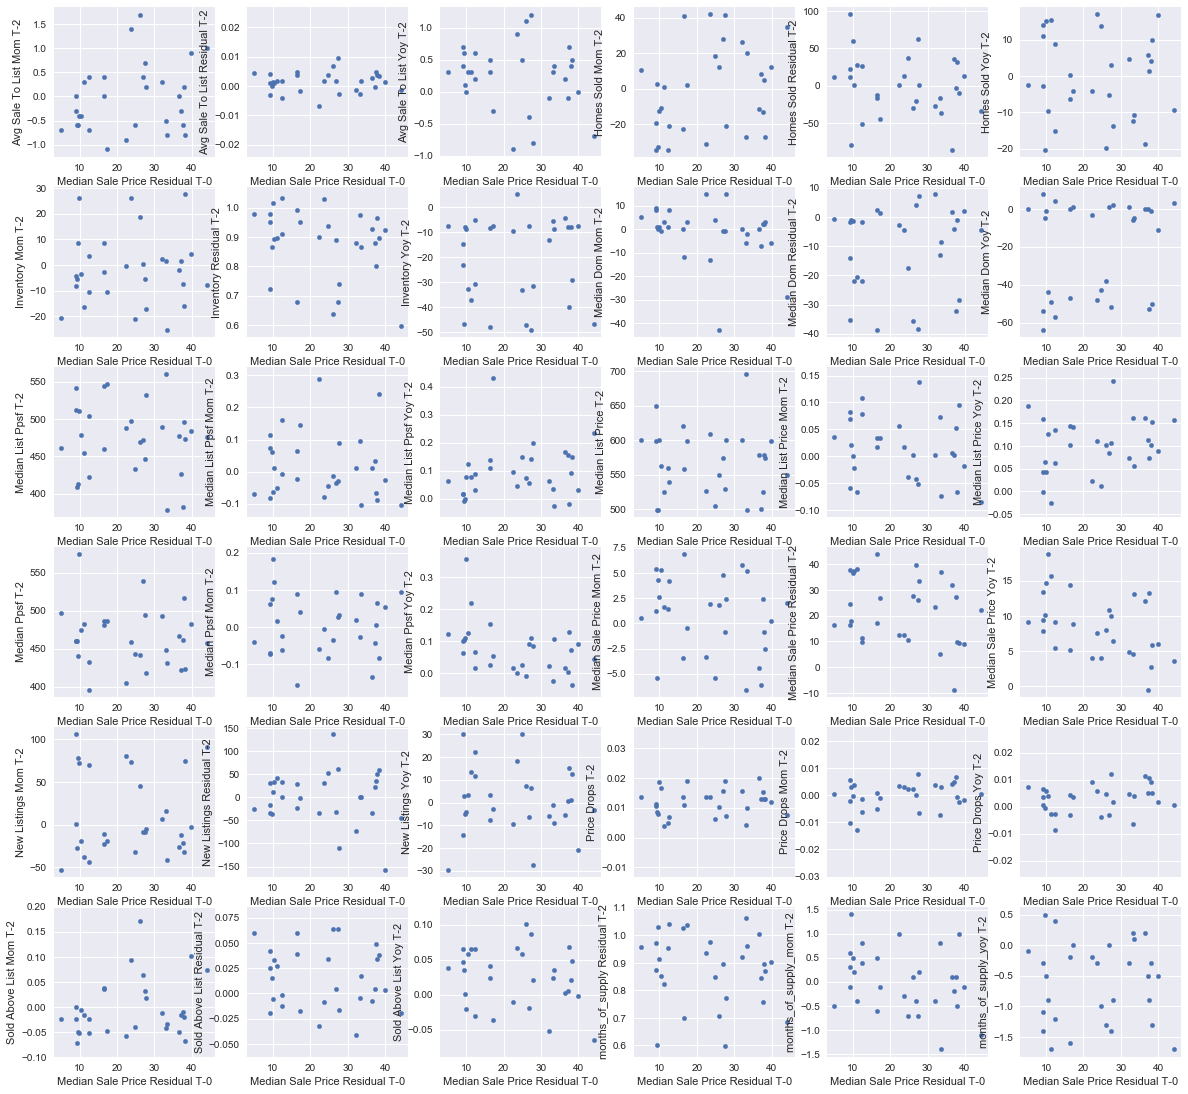

In [671]:
#36 T-1 scatter plots
fig, axes = plt.subplots(nrows=6, ncols=6)

thing = [col for col in master_master_df.columns if re.findall(r'T-2\b',col)]
#thing = [col for col in master_master_df.columns if 'Sold Above List' in col]

for i, ax in enumerate(axes.reshape(-1)):
     master_master_df.loc[month].plot(x='Median Sale Price Residual T-0',y=thing[i],kind='scatter',ax=ax,figsize=(18,18))

# Append metrics to a dictionary?

In [485]:
from sklearn.metrics import r2_score

/Users/xbno/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/xbno/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [486]:
#Period Begin messed it up
[col for col in master_master_df.columns if master_master_df[col].dtype == 'datetime64[ns]']

[]

In [530]:
corr_df = master_master_df.loc[month].corr()

In [531]:
corr_df['Median Sale Price T-0'].abs().sort_values(ascending=False).head()

Median Sale Price T-0     1.000000
Median Sale Price T-11    0.852787
Median Sale Price T-1     0.846585
Inventory Trend T-1       0.841016
Inventory Trend T-11      0.837619
Name: Median Sale Price T-0, dtype: float64

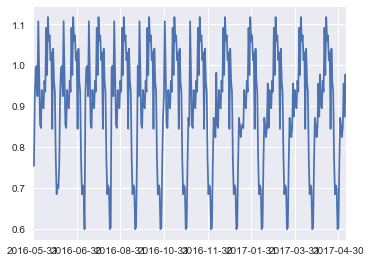

In [591]:
master_master_df['months_of_supply Residual T-12'].plot()

In [545]:
metrics_df = pd.DataFrame()
for month in months:
    r2_dict = {}
    corr_dict = {}
    master_corr_df = master_master_df.loc[month].corr()
    for col in [col for col in master_master_df.columns]:# if 'Avg Sale To List' in col]:
        #r2_dict[col] = [r2_score(master_master_df.loc[month]['Median Sale Price T-0'],master_master_df.loc[month][col])]
        corr_dict[col] = master_corr_df['Median Sale Price T-0'][col]
    #r2_df = pd.DataFrame(r2_dict,index=[month+': r2'])
    corr_df = pd.DataFrame(corr_dict,index=[month])
    #corr_df = pd.DataFrame(corr_dict,index=[month+': corr'])
    metrics_df = pd.concat([metrics_df,corr_df],axis=0)
    #metrics_df = pd.concat([metrics_df,r2_df],axis=0)
    

In [546]:
master_master_df.loc[month][col].values

array([ 0.3,  0. ,  0. , -0.9, -0.2, -0.6,  0.3, -0.4,  0. ,  0.2,  0.5,
       -0.5,  0.4,  0.1, -0.2, -0.9, -1.7, -1.3, -1.6, -1.4, -1.4, -0.9,
       -1.3, -0.9, -1.7, -1. , -1.2, -1.1, -0.3, -0.5])

In [547]:
r2_score(master_master_df.loc[month]['Median Sale Price T-0'].values,master_master_df.loc[month][col].values)

-234.71152910216745

In [548]:
[ind for ind in metrics_df.index if 'corr' in ind]

[]

In [550]:
#metrics_df.min().sort_values(ascending=False).plot()
metrics_df.loc[[ind for ind in metrics_df.index if 'corr' in ind]].max()

Avg Sale To List Mom T-1         NaN
Avg Sale To List Mom T-10        NaN
Avg Sale To List Mom T-11        NaN
Avg Sale To List Mom T-12        NaN
Avg Sale To List Mom T-2         NaN
Avg Sale To List Mom T-3         NaN
Avg Sale To List Mom T-4         NaN
Avg Sale To List Mom T-5         NaN
Avg Sale To List Mom T-6         NaN
Avg Sale To List Mom T-7         NaN
Avg Sale To List Mom T-8         NaN
Avg Sale To List Mom T-9         NaN
Avg Sale To List Residual T-1    NaN
Avg Sale To List Residual T-10   NaN
Avg Sale To List Residual T-11   NaN
Avg Sale To List Residual T-12   NaN
Avg Sale To List Residual T-2    NaN
Avg Sale To List Residual T-3    NaN
Avg Sale To List Residual T-4    NaN
Avg Sale To List Residual T-5    NaN
Avg Sale To List Residual T-6    NaN
Avg Sale To List Residual T-7    NaN
Avg Sale To List Residual T-8    NaN
Avg Sale To List Residual T-9    NaN
Avg Sale To List Trend T-1       NaN
Avg Sale To List Trend T-10      NaN
Avg Sale To List Trend T-11      NaN
A

In [503]:
metrics_df.loc['2017-04-30: r2'].head()

Avg Sale To List Mom T-1    -234.147614
Avg Sale To List Mom T-10   -234.091272
Avg Sale To List Mom T-11   -234.124257
Avg Sale To List Mom T-12   -234.124409
Avg Sale To List Mom T-2    -234.206205
Name: 2017-04-30: r2, dtype: float64

In [551]:
col = 'Sold Above List Yoy T-1'
metrics_df.loc[:,col]

2016-05-31    0.096776
2016-06-30    0.071853
2016-07-31   -0.004057
2016-08-31   -0.044539
2016-09-30   -0.183572
2016-10-31   -0.159538
2016-11-30   -0.171342
2016-12-31   -0.129944
2017-01-31   -0.073242
2017-02-28   -0.076135
2017-03-31   -0.115228
2017-04-30   -0.170244
Name: Sold Above List Yoy T-1, dtype: float64

In [587]:
#metrics_df.loc[[ind for ind in metrics_df.index if 'corr' in ind]].mean(axis=0).sort_values(ascending=False)
metrics_df.mean(axis=0).abs().sort_values(ascending=False).head(10)

Median Sale Price T-0         1.000000
Median Sale Price T-1         0.863650
months_of_supply Trend T-1    0.855795
Inventory Trend T-1           0.849635
Inventory Trend T-9           0.847352
Inventory Trend T-10          0.847216
Inventory Trend T-7           0.846952
Inventory Trend T-8           0.846536
Inventory Trend T-6           0.846488
Sold Above List Trend T-5     0.846332
dtype: float64

/Users/xbno/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/xbno/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


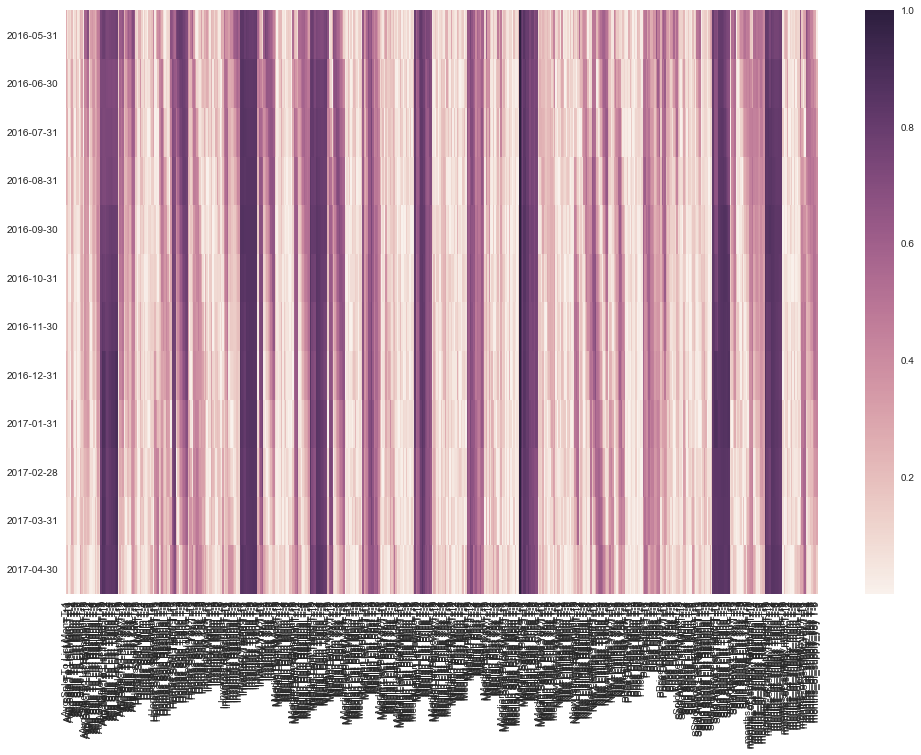

In [557]:
fig, axes = plt.subplots(figsize=(15,10))
sns.heatmap(metrics_df.abs())
#sort_metrics

In [763]:
a = metrics_df.loc['2016-05-31'].sort_values(ascending=False)

# ARIMA without decomposing (using ARMIA and SARIMAX)

In [1267]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.0.final.0
python-bits: 64
OS: Darwin
OS-release: 16.6.0
machine: x86_64
processor: i386
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

pandas: 0.20.2
pytest: 3.0.7
pip: 9.0.1
setuptools: 34.4.1
Cython: 0.25.2
numpy: 1.13.0
scipy: 0.19.0
xarray: None
IPython: 5.1.0
sphinx: 1.5.1
patsy: 0.4.1
dateutil: 2.6.0
pytz: 2017.2
blosc: None
bottleneck: 1.2.0
tables: 3.3.0
numexpr: 2.6.1
feather: None
matplotlib: 2.0.0
openpyxl: 2.4.1
xlrd: 1.0.0
xlwt: 1.2.0
xlsxwriter: 0.9.6
lxml: 3.7.2
bs4: 4.5.3
html5lib: 0.999999999
sqlalchemy: 1.1.5
pymysql: None
psycopg2: None
jinja2: 2.9.4
s3fs: None
pandas_gbq: None
pandas_datareader: None


In [23]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [1287]:
y = bos['Median Sale Price']

In [1389]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [1390]:
#ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:121.59367522968692
warnings.filterwarnings("ignore") # specify to ignore warning messages
results_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            results_list.append(param, param_seasonal, results.aic)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            #print('failed')
            continue

In [1401]:
mod = sm.tsa.statespace.SARIMAX(bos['Median Sale Price'],
                                order=(3, 2, 1),
                                seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())#.tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                  Median Sale Price   No. Observations:                   64
Model:             SARIMAX(3, 2, 1)x(2, 1, 1, 12)   Log Likelihood                 -97.853
Date:                            Mon, 12 Jun 2017   AIC                            211.705
Time:                                    20:53:32   BIC                            228.976
Sample:                                01-31-2012   HQIC                           218.509
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4341      0.321     -1.353      0.176      -1.063       0.195
ar.L2         -0.4820      0.331   

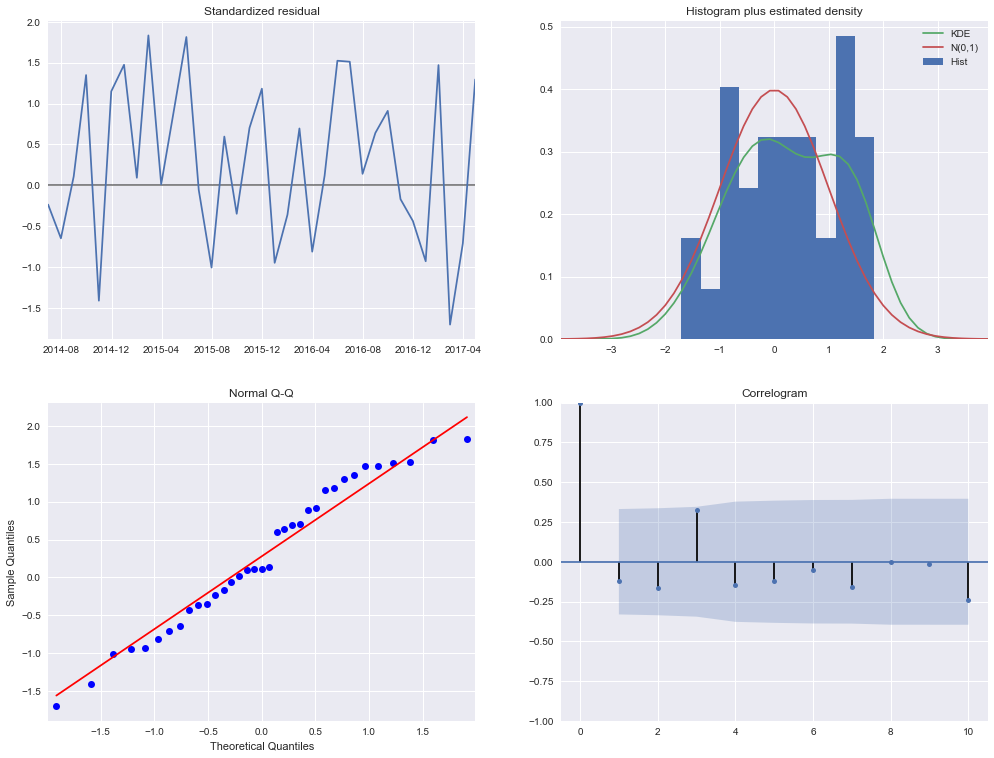

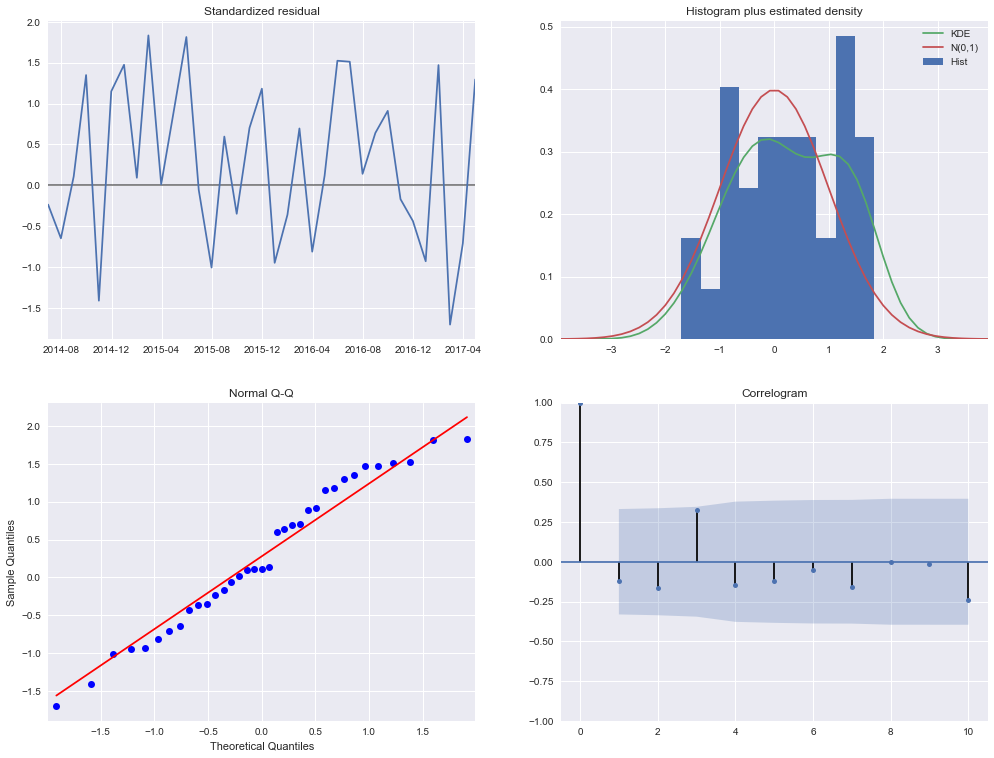

In [1395]:
results.plot_diagnostics(figsize=(15, 12))
# plt.show()

In [1402]:
pred = results.get_prediction(start=pd.to_datetime('2016-05-31'), dynamic=False)
pred_ci = pred.conf_int()

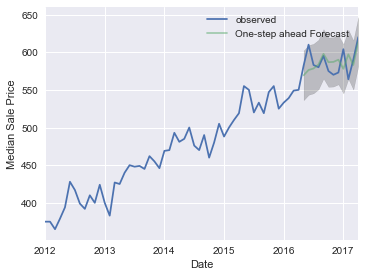

In [1403]:
ax = df['Median Sale Price'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Median Sale Price')
plt.legend()

plt.show()

In [1404]:
y_forecasted = pred.predicted_mean
y_truth = df.loc['2016-05-31':]['Median Sale Price']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 326.5


In [1405]:
bos['Median Sale Price'].values.T

array([375, 375, 365, 379, 394, 428, 417, 399, 392, 410, 400, 424, 400,
       383, 427, 425, 440, 450, 448, 449, 445, 462, 455, 446, 469, 470,
       493, 481, 485, 500, 476, 470, 490, 460, 480, 505, 488, 500, 510,
       519, 555, 550, 520, 533, 519, 547, 555, 525, 533, 539, 549, 550,
       582, 610, 583, 580, 595, 575, 570, 573, 604, 564, 590, 620])

In [1406]:
y_forecasted

2016-05-31    569.295232
2016-06-30    576.356160
2016-07-31    578.339062
2016-08-31    583.691205
2016-09-30    597.822765
2016-10-31    586.741227
2016-11-30    587.102637
2016-12-31    589.995848
2017-01-31    577.947084
2017-02-28    597.140655
2017-03-31    582.975753
2017-04-30    614.019089
Freq: M, dtype: float64

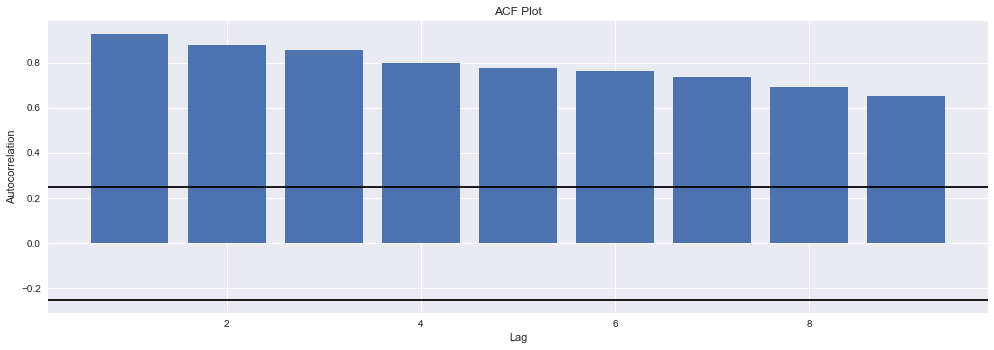

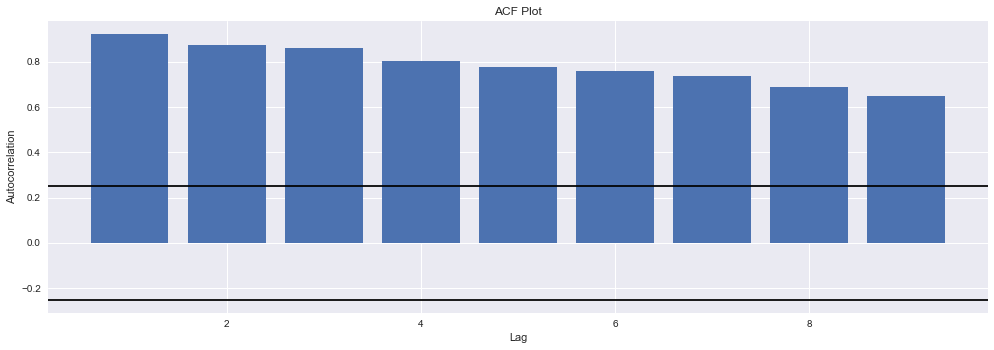

In [1256]:
import pyflux as pf
import matplotlib.pyplot as plt
pf.acf_plot(bos['Median Sale Price'].values.T)
pf.acf_plot(np.square(bos['Median Sale Price'].values.T))

In [1407]:
df.loc['2016-05-31':]['Median Sale Price']

Period End
2016-05-31    582
2016-06-30    610
2016-07-31    583
2016-08-31    580
2016-09-30    595
2016-10-31    575
2016-11-30    570
2016-12-31    573
2017-01-31    604
2017-02-28    564
2017-03-31    590
2017-04-30    620
Freq: M, Name: Median Sale Price, dtype: int64

In [955]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# My version of T-0 to T-12 - ElasticNet does alright

In [874]:
bos_med_sale_master_df = bos_med_sale_master_df.dropna(axis=0)

In [962]:
Xn = bos_med_sale_master_df.drop('Median Sale Price T-0',axis=1)
y = bos_med_sale_master_df['Median Sale Price T-0']
X = bos_med_sale_master_df.drop('Median Sale Price T-0',axis=1)

In [ ]:
target = 'Median Sale Price Residual T-0'
X_train = bos_med_sale_master_df['2016-05-31':'2017-01-31'].drop(target,axis=1)
X_test = bos_med_sale_master_df['2017-02-28':'2017-04-30'].drop(target,axis=1)
y_train = bos_med_sale_master_df['2016-05-31':'2017-01-31'][target]
y_test = bos_med_sale_master_df['2017-02-28':'2017-04-30'][target]

In [1097]:
target = 'Median Sale Price T-0'
X_train = bos_med_sale_master_df['2016-05-31':'2017-01-31'].drop(target,axis=1)
X_test = bos_med_sale_master_df['2017-02-28':'2017-04-30'].drop(target,axis=1)
y_train = bos_med_sale_master_df['2016-05-31':'2017-01-31'][target]
y_test = bos_med_sale_master_df['2017-02-28':'2017-04-30'][target]

# T-0 to T-12 target

In [1218]:
a = bos_med_sale_master_all_df.copy()

In [1148]:
bos_med_sale_master_all_df = bos_med_sale_master_all_df.dropna(axis=0)

In [1219]:
bos_med_sale_master_all_df.drop([col for col in bos_med_sale_master_all_df.columns if 'Trend' in col],axis=1,inplace=True)

In [1235]:
bos_med_sale_master_all_df.drop([col for col in bos_med_sale_master_all_df.columns if 'Seasonal' in col],axis=1,inplace=True)

In [1142]:
W = bos_med_sale_master_all_df.dropna(axis=0)
y = W['Median Sale Price T-0']
X = W.drop('Median Sale Price T-0',axis=1)

In [1143]:
X.index.unique()

Index(['2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31',
       '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
       '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30',
       '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
       '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
       '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
       '2017-03-31', '2017-04-30'],
      dtype='object')

In [1237]:
target = 'Median Sale Price T-0'
X_train = bos_med_sale_master_all_df['2013-01-31':'2016-04-30'].drop(target,axis=1)
X_test = bos_med_sale_master_all_df['2016-05-31':'2017-04-30'].drop(target,axis=1)
y_train = bos_med_sale_master_all_df['2013-01-31':'2016-04-30'][target]
y_test = bos_med_sale_master_all_df['2016-05-31':'2017-04-30'][target]

# Standard trends/seasonality removed - Arima does well

In [1001]:
bos_med_sale_df = bos_med_sale_df.dropna(axis=0)

In [1002]:
y = bos_med_sale_df['Median Sale Price']
X = bos_med_sale_df.drop('Median Sale Price',axis=1)

In [1003]:
#ss = StandardScaler()
#X = ss.fit_transform(X)

In [1004]:
X.index.unique()

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30'],
              dtype='datetime64[ns]', name='Period End', freq='M')

In [1269]:
# from sklearn.ensemble import RandomForestRegressor
# reg = RandomForestRegressor(n_estimators=150)

# from sklearn.linear_model import LinearRegression
# reg = LinearRegression()

# from sklearn.linear_model import Lasso
# reg = Lasso(alpha=.1)

from sklearn.linear_model import ElasticNet
reg = ElasticNet(l1_ratio=.7)

reg.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [1270]:
y_pred = reg.predict(X_test)

In [1281]:
y_test_T0 = []
for ind in y_test.index.unique():
    print(y_test.loc[ind].tail(1)[0])
    y_test_T0.append(y_test.loc[ind].tail(1)[0])
y_test_T0 = pd.Series(y_test_T0)

582
610
583
580
595
575
570
573
604
564
590
620


In [1272]:
y_pred = pd.DataFrame(y_pred)
y_pred.index = y_test.index

In [1282]:
y_pred_T0 = []
for ind in y_pred.index.unique():
    #print(y_pred.loc[ind].tail(1))
    y_pred_T0.append(y_pred.loc[ind].tail(1)[0])
y_pred_T0 = pd.Series(y_pred_T0)

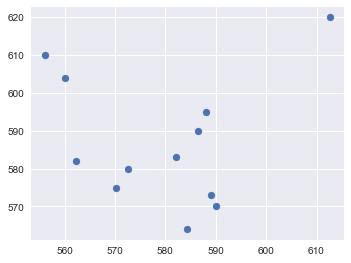

In [1283]:
plt.scatter(y_pred_T0,y_test_T0)

In [1284]:
y_pred_T0-y_test_T0

0     2016-05-31   -19.821186
Name: 0, dtype: float64
1     2016-06-30   -53.816918
Name: 0, dtype: float64
2      2016-07-31   -0.929527
Name: 0, dtype: float64
3      2016-08-31   -7.420703
Name: 0, dtype: float64
4       2016-09-30   -6.86574
Name: 0, dtype: float64
5      2016-10-31   -4.865522
Name: 0, dtype: float64
6     2016-11-30    20.011658
Name: 0, dtype: float64
7      2016-12-31    15.99843
Name: 0, dtype: float64
8     2017-01-31   -43.997484
Name: 0, dtype: float64
9     2017-02-28    20.380868
Name: 0, dtype: float64
10     2017-03-31   -3.554877
Name: 0, dtype: float64
11     2017-04-30   -7.332882
Name: 0, dtype: float64
dtype: object

In [1209]:
#holdout
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
#X_train, X_hold, y_train, y_hold = train_test_split(X,y,test_size=0.3)
tscv = TimeSeriesSplit(n_splits=2)
#X_train, X_hold, y_train, y_hold = TimeSeriesSplit(X,y,n_splits=1)

In [904]:
#train/test
X = X_train.copy()
y = y_train.copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [909]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 432)
(200,)
(51, 432)
(51,)


In [914]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lr = LinearRegression()
kfold = KFold(n_splits=10, random_state=4)
score = cross_val_score(lr,X,y,scoring='r2',cv=kfold)
np.mean(score)

0.99948297851567813

In [915]:
def cv_rmse(estimator):
    score = cross_val_score(estimator,X,y,scoring='neg_mean_squared_error',cv=kfold)
    positive_score = -score
    return np.sqrt(positive_score) #np.sqrt(positive_score)

In [916]:
a = [.0005,.0008,.001,.002,.003,.004,.005,.01,.05]
Lasso_rmse = []
Lasso_std = []
for i in a:
    Lasso_rmse.append(cv_rmse(linear_model.Lasso(alpha=i)).mean())
    Lasso_std.append(cv_rmse(linear_model.Lasso(alpha=i)).std())

In [917]:
list(zip(Lasso_rmse,a))

[(1.8681788455376416, 0.0005),
 (1.7908794397413381, 0.0008),
 (1.7377784831695322, 0.001),
 (1.305202079641423, 0.002),
 (0.95377690453734287, 0.003),
 (0.94790737274859249, 0.004),
 (0.8971343498871448, 0.005),
 (0.82590984161275627, 0.01),
 (1.8952108930172016, 0.05)]

In [918]:
from pprint import pprint
ls = zip(a,Lasso_rmse,Lasso_std)
ls = pd.DataFrame(list(ls),columns=['Alpha','RMSE','Std'])

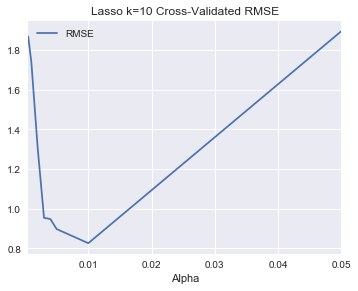

In [919]:
ls.plot('Alpha','RMSE',title='Lasso k=10 Cross-Validated RMSE')

In [925]:
lasso = linear_model.Lasso(alpha=.01)
lasso.fit(X,y)
#Lasso_coef = pd.DataFrame(lasso.coef_,index=Xn.columns)
lasso.score(X_hold,y_hold)

0.99999996173599959

In [926]:
y_pred = lasso.predict(X_hold)

In [927]:
lasso_pred = pd.DataFrame()

In [930]:
#y_hold = y_hold.reset_index()
y_hold.drop('index',axis=1,inplace=True)

#X_hold.reset_index()
#lasso_pred = pd.concat([X_hold.reset_index(),y_hold.reset_index(),pd.DataFrame(y_pred,columns=['Pred_SalePrice'])],axis=1)
#lasso_pred = pd.concat([pd.DataFrame(X_hold,columns=Xn.columns),pd.DataFrame(y_hold,columns=['Lasso_pred']),pd.DataFrame(y_pred,columns=['Pred_SalePrice'])],axis=1)
lasso_pred[Xn.columns] = pd.DataFrame(X_hold,columns=Xn.columns)
lasso_pred['SalePrice'] = pd.DataFrame(y_hold)
lasso_pred['Pred_SalePrice'] = pd.DataFrame(y_pred,columns=['Pred_SalePrice'])

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

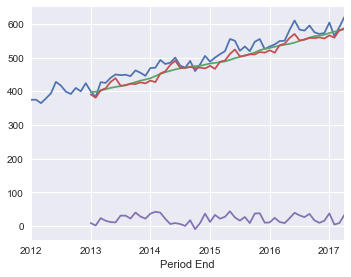

In [1442]:
decomposition = sm.tsa.seasonal_decompose(bos['Median Sale Price'], model='add', two_sided=False, freq=12)
bos['Median Sale Price'].plot()
(decomposition.trend).plot()
(decomposition.trend+decomposition.seasonal).plot()
(decomposition.resid).plot()

# Residual mean != 0, so can add to predictions

In [1443]:
mean_resid = (decomposition.resid).mean()
mean_resid

21.606597222222266

# Baseline predictions:
1. Simple Trend and Trend+Seasonality
    - Trend: __728 RMSE__
    - Trend+MeanResid: __523 RMSE__ (__525 RMSE__ multi)
    - Trend+Seasonality+MeanResid: __384 RMSE__ (__377 RMSE__ multi)
2. ARIMA and SARIMA
    - ARIMA: __418 RMSE__ (1,2,13) and (13,2,1)
    - SARIMA: __403 RMSE__ (13,2,1)(0,0,0,12)
3. ARIMA + Residuals
    - ARIMA+
    

In [1463]:
#trend+mean_resid
y = bos['2014-07-31':]['Median Sale Price']
y_pred = (decomposition.trend+mean_resid)
np.sqrt((y-y_pred)**2).sum()

523.5513888888893

In [1462]:
#trend+seasonality+mean_resid
y = bos['2014-07-31':]['Median Sale Price']
y_pred = (decomposition.trend+decomposition.seasonal+mean_resid)
np.sqrt((y-y_pred)**2).sum()

384.20416666666705

In [1464]:
#param = (1,2,13) #gridsearched: 1,2,13
param = (13,2,1)

#param = (2,2,1)
#param_seasonal = (1,1,1,12)

mod = sm.tsa.statespace.SARIMAX(bos['Median Sale Price'],
                                order=param,
                                #seasonal_order=param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

In [1465]:
y = bos['2014-07-31':]['Median Sale Price']
y_pred = results.predict(start=pd.to_datetime('2014-07-31'),dynamic=False)
np.sqrt((y-y_pred)**2).sum()

403.648771368825